<img src="https://aithority.com/wp-content/uploads/2021/03/scaler.jpg" alt="Scaler Academy" style="width:1500px; height:1500px;">


<font size="7" color="blue"><b>Analyzed By:</b>
<br>
<font size="6">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Shama Bansal</font>


#<font color='blue'> ***Problem Statement*** <color/>

**Background**:  
Scaler, an online tech-versity, is renowned for offering intensive courses in Computer Science and Data Science through live classes delivered by industry experts. With a meticulously structured curriculum, Scaler enhances the technical skills of professionals, providing exposure to cutting-edge technologies. As Scaler continues to expand, understanding the diverse professional backgrounds of its learners is crucial for customizing educational offerings, improving retention, and enhancing satisfaction.

**Business Challenge**:  
The key challenge for Scaler lies in identifying patterns within the diverse learner database, especially in terms of current job roles, companies, and professional experiences. By uncovering these patterns, Scaler aims to cluster learners with similar profiles to:  
- Deliver a personalized and relevant learning experience.  
- Tailor content recommendations and mentorship programs.  
- Profile the best companies and job positions for their alumni.  

Key Points:<br>
1) **Objective**:  
The goal is to analyze learner data, perform clustering, and derive actionable insights to enhance course offerings and learner experiences. Specifically:  
  - **Cluster learners** based on job profiles, companies, and additional relevant features.  
  - Evaluate the **coherence and interpretability of the clusters** to ensure meaningful segmentation.  
  - Provide **insights** that can inform content tailoring, separate learning groups, mentorship allocation, and job placement support.    
  - The ultimate goal is to extract meaningful insights, such as identifying trends, common characteristics, or preferences among learners in similar roles or companies.

2) **What You're Profiling**:
   -  **Job profiles**: Roles like Software Engineer, Data Scientist, Product Manager, etc.
   - **Companies**: Organizations learners are associated with, such as top tech companies, startups, etc.
   - **Other features**: Possibly data about salary, years of experience, location, skills, educational background, or performance.

3) **Why Clustering Learners?**
   - Clustering learners into groups with similar characteristics helps uncover patterns like:
   - Common job roles learners pursue.
   - Key attributes of learners at top companies.
   - Segments of learners needing additional training to land high-demand roles.
   - These insights can guide Scaler in improving its programs or targeting specific learners for career enhancement.

4) **Outcome**:
   - Clusters provide actionable insights into which companies and roles learners are most successful in.
   - Scaler can use these insights to better market their offerings, recommend career paths, or focus training on high-value roles.


**Scope of Work**:  
- **Data Understanding and Preprocessing**: Conduct exploratory data analysis (EDA), handle missing values, and prepare data for clustering.  
- **Feature Engineering**: Extract meaningful features from the dataset to enhance clustering performance.  
- **Clustering Techniques**: Apply unsupervised learning methods such as K-means, Hierarchical Clustering, or other relevant algorithms.  
- **Cluster Evaluation**: Assess cluster quality using metrics like silhouette score, Davies-Bouldin index, or domain-specific coherence.  
- **Actionable Insights**: Translate cluster characteristics into strategic recommendations for personalized learning paths, targeted mentorship programs, and job profiling.

**Learning Opportunity for Participants**:  
- Gain hands-on experience with **unsupervised learning** techniques to solve real-world challenges.  
- Develop expertise in **EDA**, feature engineering, and clustering evaluation.  
- Understand how data-driven decision-making can enhance **business strategies** in the EdTech domain.  
- Collaborate on translating raw data into insights that can shape organizational outcomes.  



## ***Data Dictionary*** <br>

**Unnamed 0** - Index of the dataset<br>
**Email_hash** - Anonymised Personal Identifiable Information (PII)<br>
**Company_hash** - This represents an anonymized identifier for the company, which is the current employer of the learner.<br>
**orgyear** - Employment start date<br>
**CTC** - Current CTC<br>
**Job_position** - Job profile in the company<br>
**CTC_updated_year** - Year in which CTC got updated (Yearly increments, Promotions)
<br>


# <FONT COLOR='blue'>*Importing Necessary Modules*

In [ ]:
!pip install pyspellchecker

In [3]:
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from spellchecker import SpellChecker

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uploading Dataset
# uploaded=files.upload()

In [ ]:
# Reading Dataset
# df = pd.read_csv(io.BytesIO(uploaded['scaler_clustering.csv']))
# df.head()

In [ ]:
# Reading Dataset
df=pd.read_csv('scaler_clustering.csv')
df.head()

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

In [ ]:
# Dataset Observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


- Raw dataset contains 205843 rows nd 7 columns
- 2 columns **ctc** and **unnamed:0** have int datatype, 2 have- **orgyear** and **ctc_updated_year** float dtype and 3 object dtypes- **company_hash**,**email_hash** and **job_position**

In [ ]:
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

# ***Data Preprocessing***

unnamed:0 has all unique values means working as index column only, so removing it

In [ ]:
# Dropping Unnecessary column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# Checking Duplicate Values
df.duplicated().sum()

34

In [ ]:
df[df.duplicated()]

company_hash  \
97138                            wtqtzwt xzw   
98085                                   2020   
102600                          voxvz uvxzno   
109324                      wgbwvon mhoxztoo   
110833                zgn vuurxwvmrt vwwghzn   
111354             uyxrxuo xzzgcvnxgz wvbuho   
111521                      aqggb ntwyzgrgsj   
115241                   rgfto wgbuvzxto xzw   
117246                                xatbxv   
117549                               exzdtqv   
120371  avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta   
121946                          oguqv ontqxv   
122316                               eqtoytq   
130495                                xatbxv   
138371                                 xicxv   
141686                      uhmrxwxo ovuxtzn   
143061   vwwtznhqt ogrhnxgzo uqxcvnt rxbxnta   
146097                          axvouvqp xzw   
151473                   rgfto wgbuvzxto xzw   
157950                        ti ntwyzgrgsxw   
161251                     avnvftvct ucn rna   
164554                            ng nyt ztf   
165326                      uhmrxwxo ovuxtzn   
171421                               fyvnexd   
175942                            tdnqvbvqpo   
179858                           buyvoxo rna   
180630                      uhmrxwxo ovuxtzn   
182531                             xznqvrxzp   
195375               souvzz ntwyzgrgsxto xzw   
196492                                  2020   
196971                                  2020   
201165                            xzzgcvwwtq   
203257                      uhmrxwxo ovuxtzn   
205733                      uhmrxwxo ovuxtzn   

                                               email_hash  orgyear      ctc  \
97138   bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...   2014.0  1000000   
98085   6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...   2020.0   720000   
102600  c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...   2020.0  1280000   
109324  0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...   2016.0   700000   
110833  8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...   2019.0   500000   
111354  704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...   2017.0   850000   
111521  df81dac132d66a42a0c71a4799e1040731738e542c81ff...   2017.0  1270000   
115241  ea363e930dabe0fbb63438e07775af3cb3b32639947c47...   2017.0  1100000   
117246  f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...   2019.0   640000   
117549  e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...   2020.0  1500000   
120371  15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c...   2016.0  1300000   
121946  f48d4cd35091adb89c8e82b8bc39b68416e2e954e406fd...   2016.0  1250000   
122316  567e7ff3ad74ce235a75b1feea224204d35cd698922e59...   2018.0   900000   
130495  80a04f3eb89aa385e32b6e1c9a0b564730274632fad4c4...   2017.0   409999   
138371  d0e72d551c69a2f9d96914515aeef797f4989b54c90ef0...   2014.0  1200000   
141686  f27a6a759a02e90ebd17041fb26b72d13420d53edcdc99...   2020.0   940000   
143061  bf09ce2b61e3bba0846412cf76b2e408c92384b373f709...   2014.0   800000   
146097  8e5fe3154be66d7cd8730224318d913ecd10ec5197e20a...   2017.0  1000000   
151473  f67d3be9653bca997a75c81a88e851bcf0368fd83255aa...   2017.0  1265000   
157950  843a5216e56e06b9d31d35e0c3820beec3af19dc4978af...   2019.0   850000   
161251  5083a995fa1623fd7d329766f8e7adbe5497a8c3c826f9...   2018.0   800000   
164554  7b47ee99ce695d48d18dea36d3c6cc73e3b5b40ed477cf...   2019.0   450000   
165326  d40b483baf912b9f21cd1952e8b79388ce88ed5222d3d8...   2019.0  1200000   
171421  7e2ac7c6b9051177ea51af3f7c8e934d6d3ce15a5cb587...   2020.0  1300000   
175942  82b93606127fa5ed0d28cb32469d7ba177b8e70088608c...   2019.0   350000   
179858  bd443574985b2f72a4a382b6be392db2358158761f38de...   2016.0   750000   
180630  59e67f9f149ede96889afacb1a70645fd3f309e3a1fa43...   2019.0  1620000   
182531  c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...   2016.0  6730000   
195375  31fefa78a0f32b56c8f0d60d2355d92c480b4ba95fcd83...   

In [ ]:
df.iloc[109324,1]

'0442a51ef5080d7d40721c007131a1d5bdeabae2c1b1537b5d472a937b6ab5cb'

In [ ]:
df[df['email_hash']=='71aa46088d2a416970bb7620dbed05b7f0bfcebf9d349360bb2404ae6cee0bf6']

company_hash                                         email_hash  \
80494   vxqntr drvmo  71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...   
109328        vxqntr  71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...   
117390  vxqntr drvmo  71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...   

        orgyear      ctc      job_position  ctc_updated_year  
80494    2016.0  2500000  Backend Engineer            2021.0  
109328   2016.0  1800000               NaN            2020.0  
117390   2016.0  2500000               NaN            2021.0

The rows are duplicated for some users, even sometimes having NaN values in one of the rows.Drpping those duplicate rows.

In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# @title *Checking Missing Values*
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

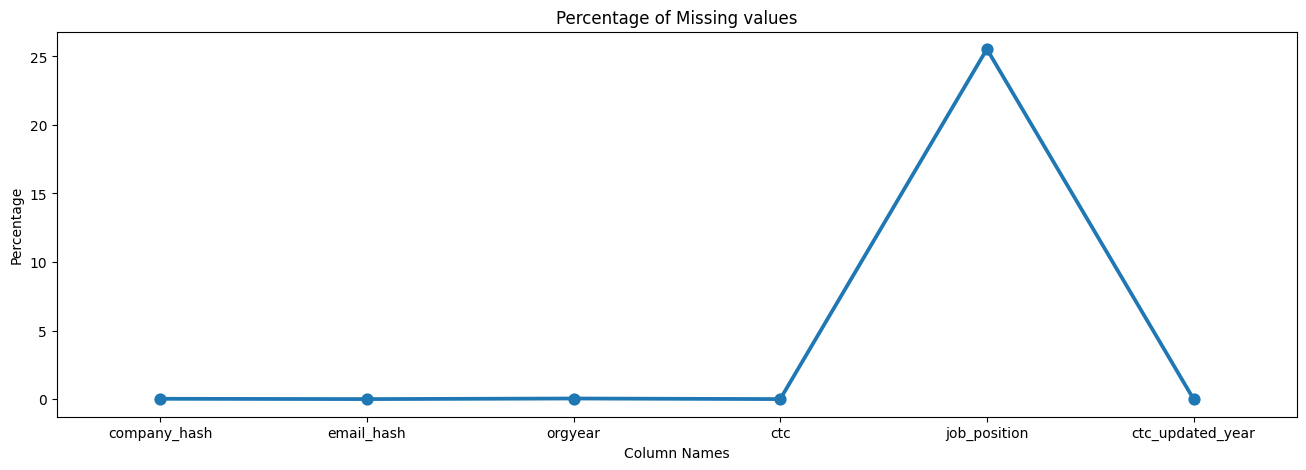

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)          # column name=0
plt.xticks(fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")
plt.show()

We can see almost 25% data from `job_position` column is missing.

In [ ]:
df.email_hash.value_counts().head(10)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
Name: count, dtype: int64

In [ ]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

company_hash  \
24109   oxej ntwyzgrgsxto rxbxnta   
45984   oxej ntwyzgrgsxto rxbxnta   
72315   oxej ntwyzgrgsxto rxbxnta   
102915  oxej ntwyzgrgsxto rxbxnta   
117764  oxej ntwyzgrgsxto rxbxnta   
121483  oxej ntwyzgrgsxto rxbxnta   
124476  oxej ntwyzgrgsxto rxbxnta   
144479  oxej ntwyzgrgsxto rxbxnta   
152801  oxej ntwyzgrgsxto rxbxnta   
159835  oxej ntwyzgrgsxto rxbxnta   

                                               email_hash  orgyear     ctc  \
24109   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
45984   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
72315   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
102915  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
117764  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
121483  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
124476  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
144479  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
152801  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
159835  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   

              job_position  ctc_updated_year  
24109                  NaN            2020.0  
45984     Support Engineer            2020.0  
72315                Other            2020.0  
102915  FullStack Engineer            2020.0  
117764        Data Analyst            2020.0  
121483               Other            2019.0  
124476    Support Engineer            2019.0  
144479  FullStack Engineer            2019.0  
152801     Devops Engineer            2019.0  
159835                 NaN            2019.0

In [ ]:
df.drop(columns=['job_position']).duplicated().sum()

38948

As we can see if we remove the Job_positions, there will be **39948** duplicate instances. So there is a possibility that a person can work for many roles which are integrated into each other but instead of nesting them, these are shown as different rows.
A learner changing position 10 times in same company and in 2 years is quite illogical.

In [ ]:
df['job_position'].value_counts().head(10)

job_position
Backend Engineer          43546
FullStack Engineer        24711
Other                     18071
Frontend Engineer         10417
Engineering Leadership     6870
QA Engineer                6587
Data Scientist             5367
Android Engineer           5356
SDET                       4967
Devops Engineer            4612
Name: count, dtype: int64

In [ ]:
df[df['job_position'].str.contains('Software',case=False, na=False)]['job_position'].value_counts()

job_position
Senior  Software Engineer                         55
Software Engineer (Backend)                       42
Software Engineer 2                               22
Associate Software Engineer                       18
Software  Engineer                                17
                                                  ..
Senior Software Development Engineer (Backend)     1
Software Enginnering Specialist                    1
Senior Engineer Software                           1
Software Engineer(Advanced Analytics)              1
Analyst / Software Engineer                        1
Name: count, Length: 177, dtype: int64

There are different job_positions like SDE1, SDE2, software engineer, senior software engineer, software engineer 2 etc, which can be a single role, so lets integrate them into one. But before that lets try to fill null values in this column using users mode value for job_position.

In [ ]:
df['job_position'].isna().sum()

52548

In [ ]:
# @title *Treating Missing Values*
# for job_position column
def fill_with_mode(group):
    mode_job = group['job_position'].mode()
    return group['job_position'].fillna(mode_job[0] if not mode_job.empty else 'Unknown')

df['job_position']=df.groupby('email_hash').apply(fill_with_mode).reset_index(level=0, drop=True)

In [ ]:
df['job_position'].isna().sum()

0

# <font color='blue'> *Univariate Analysis*

### *JOB_POSITION*

In [ ]:
df['job_position'].value_counts()

job_position
Backend Engineer                 53985
FullStack Engineer               31110
Other                            22110
Unknown                          21155
Frontend Engineer                12775
                                 ...  
Big data Developer                   1
Data Specialist                      1
Senior System Engineer               1
Instructional Apprentice             1
Android Application developer        1
Name: count, Length: 1017, dtype: int64

In [ ]:
# Cleaning Data
import re

def clear_feat(col_data):
    new_data=re.sub('[^A-Za-z ]+', '', col_data)
    return new_data

In [ ]:
df['job_position']=df['job_position'].apply(clear_feat)
df['job_position']=df['job_position'].str.strip().str.lower()
df['job_position']

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838               unknown
205839               unknown
205840               unknown
205841               unknown
205842               unknown
Name: job_position, Length: 205809, dtype: object

In [ ]:
# checking duplicate values after cleaning job_position and filling nan values
df.duplicated().sum()

26821

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(178988, 6)

In [ ]:
df['job_position'].nunique()

856

In [ ]:
df['job_position'].value_counts().iloc[:235]

job_position
backend engineer                      45575
fullstack engineer                    26812
unknown                               21155
other                                 18562
frontend engineer                     10715
                                      ...  
mainframe developer                       2
research analyst                          2
insurance agent                           1
technical engineer                        1
lead software development engineer        1
Name: count, Length: 235, dtype: int64

We can see there are only 232 job_positions which have atleast 2 users, remaining 624 roles are those for which only 1 learner is there, which shows that learners belonging to these roles are negligible or kind of outliers.
Lets see if these roles have any particular features.

In [ ]:
spell = SpellChecker()

misspelled = spell.unknown(list(df['job_position'].values)[:100])
dicter={}
for word in misspelled:
    dicter[word]=spell.correction(word)

print(dicter)

{'sdet': 'set', 'data analyst': None, 'frontend engineer': None, 'fullstack engineer': None, 'android engineer': None, 'qa engineer': None, 'research engineers': None, 'engineering leadership': None, 'data scientist': None, 'security leadership': None, 'backend engineer': None, 'engineering intern': None, 'ios engineer': None, 'support engineer': None}


spell checker not working fine(converting sdet to set), so correcting some spellings manually

In [ ]:
replace_dict = {'r  d engineer':'rd engineer',
                'softwear':'software',
                'sw':'software',
                'sofware':'software',
                'mgr':'manager',
                'front end':'frontend',
                'back end':'backend',
                'devlopment':'development',
                'full stack':'fullstack',
                'reasearch':'research',
                'credit':'credits',
                'it ':'IT  ',
                'eingineer':'engineer',
                'analayst':'analyst',
                'enginner':'engineer',
                'devloper':'developer',
                'unempolyed':'unemployed',
                'maricketing':'marketing',
                'engineet':'engineer'
                }

for old_value, new_value in replace_dict.items():
    df['job_position'] = df['job_position'].str.replace(old_value, new_value)

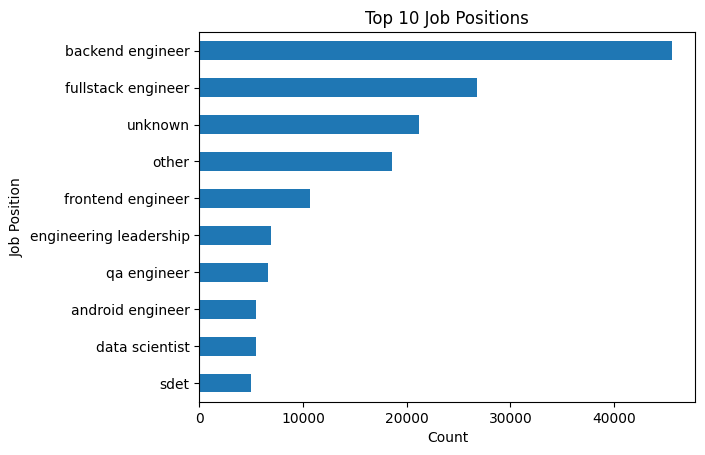

In [ ]:
df['job_position'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Job Positions')
plt.xlabel('Count')
plt.ylabel('Job Position')
plt.show()

Backend engineers dominate with 45,575 counts, followed by fullstack engineers at 26,818, reflecting industry demand for backend and versatile development skills. A significant "unknown" category (21,155) suggests data refinement is needed but due to less knowledge about missing values, keeping it as it is.

In [ ]:
# binning job_positions into categories
def categorize_job(title):
    if 'intern' in title or 'trainee' in title:
        return 'Internship'
    elif any(keyword in title for keyword in['ceo','founder','entrepreneur','cto']):
        return 'Top Officials'
    elif 'analyst' in title or 'analytics' in title:
        return 'Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif any(keyword in title for keyword in ['research','rd ',' rd','scientist']):
        return 'Research'
    elif 'data' in title and 'engineer' in title:
        return 'Data Engineer'
    elif any(keyword in title for keyword in ['facilitator','teacher','teaching','lecturer','pgt','professor','faculty']):
        return 'Teaching'
    elif any(keyword in title for keyword in ['test','qa','qc','automation']):
        return 'Quality Assurance and Testing'
    elif any(keyword in title for keyword in ['software','sde','developer','programmer']):
        return 'Software'
    elif any(keyword in title for keyword in ['manager','leader','head','director','lead','executive','president']):
        return 'Management'
    elif any(keyword in title for keyword in ['mobile','ios','flutter','android']):
        return 'Mobile Engineer'
    elif any(keyword in title for keyword in ['machine learning', 'ml', 'm l','aiml','ai']):
        return 'ML Engineer'
    elif any(keyword in title for keyword in['learning','no job','student','fresher', 'graduate', 'not employed','unemployed']):
        return 'Fresher'
    elif 'frontend' in title or 'web' in title:
        return 'Frontend Engineer'
    elif any(keyword in title for keyword in ['backend','application','integration']):
        return 'Backend Engineer'
    elif any(keyword in title for keyword in ['support','technical','escalation','services','release','pop', 'risk investigator','power plant','fibre','highway','room','mechanical']):
        return 'Support & Maintenance Engineer'
    elif any(keyword in title for keyword in['cyber','IT','iaas','cloud','techops','server','ware','devops','system','performance','radio']):
        return 'IT and Cyber Security'
    elif any(keyword in title for keyword in['product','solution','project','fullstack','implementation','development','platform','design','engineer']):
        return 'Product Development'
    elif any(keyword in title for keyword in['database administrator','oracle dba','linux administrator','network administrator']):
        return 'Database Administration'
    elif any(keyword in title for keyword in ['talent','human','chief people','consul']):
        return 'Human Resources'
    elif any(keyword in title for keyword in ['administrat', 'associate','data','technology']):
        return 'Operations/Administrative Roles'
    elif 'unknown' in title:
        return 'Unknown'
    else:
      return 'Non Technical Roles'

df['job_category'] = df['job_position'].apply(categorize_job)
df['job_category'].value_counts()

job_category
Backend Engineer                   46916
Product Development                28255
Unknown                            21155
Non Technical Roles                19318
Frontend Engineer                  10725
Management                          9190
Mobile Engineer                     8262
Quality Assurance and Testing       6708
Software                            5728
Data Scientist                      5478
IT and Cyber Security               4795
Support & Maintenance Engineer      3886
Analyst                             3127
Internship                          2929
Research                            1313
Database Administration              563
Top Officials                        395
Human Resources                       70
Operations/Administrative Roles       56
Fresher                               37
ML Engineer                           29
Data Engineer                         27
Teaching                              26
Name: count, dtype: int64

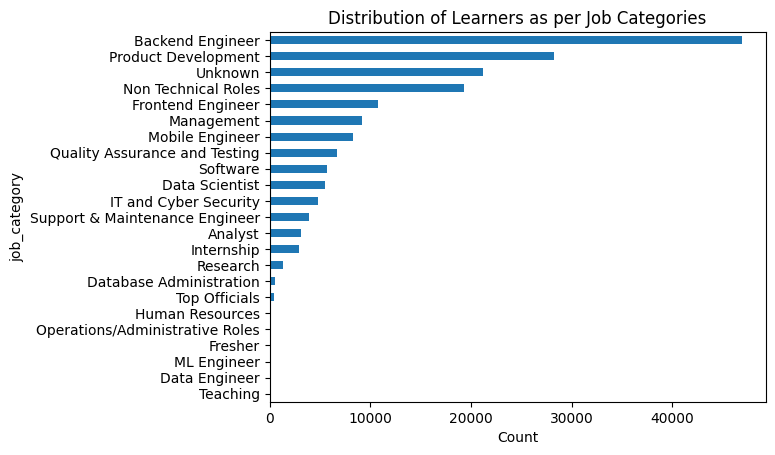

In [ ]:
df['job_category'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Distribution of Learners as per Job Categories')
plt.xlabel('Count')
plt.show()

1. **Backend Engineer Leads**: The "Backend Engineer" category remains the most prominent with **46,916** learners, reflecting its critical role in product architecture.  

2. **Product Development in High Demand**: "Product Development" emerges as the second-largest category with **28,255** learners, showcasing its importance in creating innovative solutions.

3. **Significant Unknown Data**: The "Unknown" category (**21,155**) indicates a need for improved job role classification or data quality.

4. **Non-Technical Roles are Substantial**: With **19,318** learners, non-technical roles form a notable segment, highlighting Scaler's appeal beyond technical domains.

5. **Data Science Shows Potential**: The "Data Scientist" category has **5,478** learners, underscoring growing interest in this high-demand field.

6. **Specialized Roles Are Niche**: Categories like "ML Engineer" (**29**) and "Data Engineer" (**27**) indicate niche interest areas with scope for targeted growth.

In [ ]:
# checking roles in non technical category
df[df['job_category']=='Non Technical Roles']['job_position'].value_counts().head(15)

job_position
other             18562
non coder           601
                      9
mts                   9
na                    5
no                    4
ase                   3
sales                 3
driver                2
not applicable        2
technician            2
zomato                2
so                    2
owner                 2
mts  ii               2
Name: count, dtype: int64

In [ ]:
df[df.drop(['job_position'],axis=1).duplicated()]

company_hash  \
4718                                          bxwqgogen   
5110                                          avzopt xn   
9854                    vwwgrxnt ogenfvqt xzaxv ucn rna   
10014   lvjutt xzonxnhnt ge xzegqbvnxgz ntwyzgrgsjzgxav   
10397                                   ovx trtwnqxwvro   
...                                                 ...   
202157                        xmb xzaxv uqxcvnt rxbxnta   
202182                                           gqvwrt   
202524                                         ouqxzsbr   
203432                       ytfrtnn uvwpvqa tzntquqxot   
204918                                   adw ntwyzgrgsj   

                                               email_hash  orgyear      ctc  \
4718    dceb289be0e23a77c5a02d193997abc3109e8805101777...   2011.0  6900000   
5110    3d6fb1d08f0e6129d97089626f33ca3747a9d495291723...   2005.0  4400000   
9854    e384a1c1bce518ec3962ed3da2b626a007edf66cce2458...   2011.0  2100000   
10014   e83088332191a14dfaa9131eeafb4f596809c34b8520c2...   2018.0   200000   
10397   7d021961cae2b6eaacce2c09ecaa75320654f8b63ef2c5...   2016.0   860000   
...                                                   ...      ...      ...   
202157  ea3b6c66270fb97616a8315fe203314a033da841ab4793...   2016.0  1675000   
202182  be83bbdb1a0909062489156ed76be3a9ce815274339a81...   2008.0  2000000   
202524  ee5ab46320f580d8b5bf508bb75df74d6cbca13f963cd5...   2011.0  1800000   
203432  a566e153d1fafc0be8d4a28038fd4616d09a97a32ab0c5...   2016.0   200000   
204918  9a965b65f571cd8233ffb083660bc87ccdc6291838b301...   2012.0  5000000   

               job_position  ctc_updated_year         job_category  
4718      backend architect            2019.0     Backend Engineer  
5110    architect team lead            2021.0           Management  
9854       backend engineer            2020.0     Backend Engineer  
10014     backend architect            2019.0     Backend Engineer  
10397       product manager            2020.0           Management  
...                     ...               ...                  ...  
202157    backend architect            2019.0     Backend Engineer  
202182    backend architect            2019.0     Backend Engineer  
202524    backend architect            2021.0     Backend Engineer  
203432            non coder            2021.0  Non Technical Roles  
204918      product manager            2019.0           Management  

[409 rows x 7 columns]

 We are not much worried about the change in level of a person but in the domain of the person job profile as a whole so dropping job position column as these are binned into job category.

In [ ]:
# Dropping job_position after binning
df_new=df.copy()
df_new.drop(columns=['job_position'],inplace=True)

In [ ]:
# dropping duplicates
df_new.drop_duplicates(inplace=True)
print('Shape of Dataset before Dropping Duplicates',df.shape)
print('Shape of Dataset after Dropping Duplicates',df_new.shape)

Shape of Dataset before Dropping Duplicates (178988, 7)
Shape of Dataset after Dropping Duplicates (178579, 6)


### *COMPANY_HASH*

In [ ]:
df_new['company_hash'].value_counts().head(10)

company_hash
nvnv wgzohrnvzwj otqcxwto    6556
xzegojo                      4284
vbvkgz                       3091
wgszxkvzn                    2541
zgn vuurxwvmrt vwwghzn       2457
vwwtznhqt                    2294
gqvwrt                       2184
fxuqg rxbxnta                2131
bxwqgogen                    1959
wvustbxzx                    1621
Name: count, dtype: int64

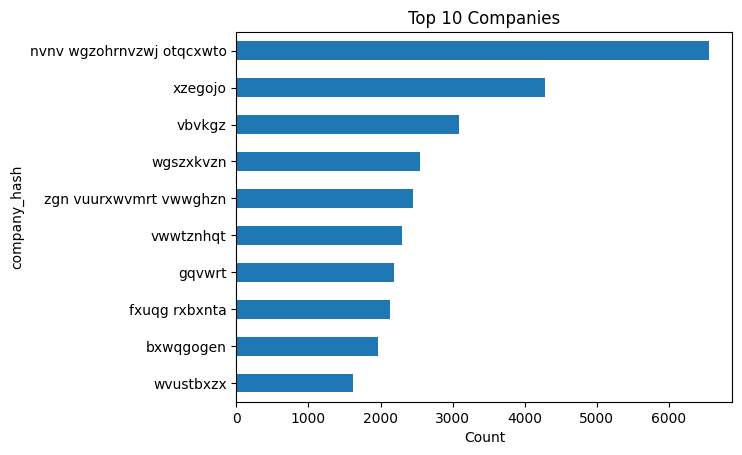

In [ ]:
df_new['company_hash'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.show()

1. **Top Company Leads by a Large Margin**: The company with the hash `nvnv wgzohrnvzwj otqcxwto` has the highest number of learners (**6,556**), indicating it may have a significant workforce interested in upskilling.

2. **Second and Third Companies**: `xzegojo` (**4,284**) and `vbvkgz` (**3,091**) follow, with learner counts significantly lower than the top company, showing a steep drop in representation.

3. **Diverse Representation**: The remaining companies in the top 10 have learner counts ranging from **2,541** to **1,621**, indicating a relatively more even distribution among mid-tier companies.

4. **Focus Areas**: These companies might represent sectors or industries with higher demand for skills offered by Scaler, potentially in technology or software development.

### *COMPANY_HASH*

In [ ]:
df_new.email_hash.value_counts().head(10)

email_hash
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183    8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551    7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be    7
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b    7
5dcd62ab1a606642f3dde6f536f5a343a8e943f215c463f945dd1bad9bff1531    7
Name: count, dtype: int64

In [ ]:
df_new[df_new.email_hash=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

company_hash  \
24109   oxej ntwyzgrgsxto rxbxnta   
45984   oxej ntwyzgrgsxto rxbxnta   
72315   oxej ntwyzgrgsxto rxbxnta   
117764  oxej ntwyzgrgsxto rxbxnta   
121483  oxej ntwyzgrgsxto rxbxnta   
124476  oxej ntwyzgrgsxto rxbxnta   
144479  oxej ntwyzgrgsxto rxbxnta   
152801  oxej ntwyzgrgsxto rxbxnta   

                                               email_hash  orgyear     ctc  \
24109   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
45984   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
72315   bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
117764  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  720000   
121483  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
124476  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
144479  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   
152801  bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...   2018.0  660000   

        ctc_updated_year                    job_category  
24109             2020.0             Product Development  
45984             2020.0  Support & Maintenance Engineer  
72315             2020.0             Non Technical Roles  
117764            2020.0                         Analyst  
121483            2019.0             Non Technical Roles  
124476            2019.0  Support & Maintenance Engineer  
144479            2019.0             Product Development  
152801            2019.0           IT and Cyber Security

In [ ]:
df_new.email_hash.value_counts().iloc[20700:20750]

email_hash
c46c96123d87555dda7f94aa9ffdf0c5650a9d3f3476075593b218aa4f8e881e    2
0a43cdd08bd4b6e9f6d1a00dbe9ff677bac0abcb782726aa597a5e1343210014    2
8991f338487bb642707a2464cf1bb260b3a3647b6ecfd2f1762e334fa5b11770    2
025a0644560a195911fae51d9f80a7484ffca021bb3f0cbdd282ca098723ae55    2
4f329c5cc0576e2869473a71b465aa672c6c96d48b2029fadfa98a6cc67a578e    2
c19b16e81b50b1ed49c6a8249996eb45ac2ffff3a5117ed2b677156b6ed62c18    2
3bd8bf218009d02adca948e70a3a02238e9fc7f31116245368a9eb246faede40    2
c97ca840265241d6c2885363180f5e605d758293135442ef9b682b00d4a4f482    2
a23f9bfdc5939b383188217a9f46f6fd78bd15c596aa659befe60cfcd4e585e8    2
1cef28f6a7424280bf1c8799a58d40e9c971314187eb18951649d727082afaec    2
3e858fc3d9b1d95e624d947076570d63c877b81fceb7c19fb8e93417c9947f1c    2
8fd3fdd89c9b9c14e4d8d5bb2232686bb76b1bbe84f538b963857e835565e2e1    2
6525149ec8ac4c7c821fb6a4118559aa70b2d3645336bc28de32dd35b6ce55f2    2
590d3273b78323bc88eb14b5469645efdbdb0f48f8bd8bdadd95471516692c14    2
1f840deb6d4a71824356188897d216fed8b4fe8fcc5fc6b8564129faca0d9508    2
95fce3e4a406150f66534f5cb2ae8ee2ff165b4aea333b2ae9c04224eb91dec9    2
7a7307a41f7b8d6c7f4e13cecfc5bb1ea4973526a8804dac5ef18ca7d57875fc    2
f27ebe19536b96f3940debfbd2be0576087a43842957bfebff0d7da0af2a6aae    2
ca3bd1257c493aa2740806fda02ef06fa7d268bff0a58998e7d66f0456c4eb41    2
4d47f89013a2e8933ded4b3532a9554f0241dab1755de2578d5e46e5199f423f    2
022c5dca8571171f5392a63491f7be320b0bc80a5a55235aa4f998757178e6ff    2
ccaec4c3f6f0b8d4a5defcf601b4dd058b9dc98d2b7d280e9049fe6be7bb2813    2
156b3fb694787de90bfb89c92de1da7ae85eeb8c9796ab66eb90b14b9f7b629d    2
3180e39911017ba6834112a47e321d190cd7b1173b00bb955408b618612db452    2
d375bac2947ca472b819d8c41da58e018ac58c0f88da727b6fd88cec415601d5    2
445dc7bafc1b759ca0e9fc9f15a049b0eabf4c14e6879f899f0d83d4bedee99f    2
405acce4415219a5001f40c37ca2e5f07d433a8e769641d1a1fb3b5d5590e136    2
031e342d99561084c7ad723d4ae37574874d9d6828d3bb219bb77ea7da357827    2
2347371291b91af5ba7406d5ea9411a8ec1be292800915c5837412b36bfb9d49    2
fbb0212c4c4d6c2cc3b545a5fe427071784f33aaf2b2819f63170ea23561e560    2
b1ff8e52ab047ab6debd926d92858bf2452f694913d77810968f870bb2528432    2
5c1a26ca81504a9424e2ee1e7bcf808d05e5e03e51afb2ef77da4cc9cc73104e    2
55f67a71933df81b2d98d628ba8e44c4b3fd4a417e71a745073f9a22b243b02a    2
f4144828cfdbf17b483feab642e533d7054159077da382133fca18c4cf51e2b5    2
f3cc477d9491f662a3c851ab9334190ae42226a72acae52474ca8959dd64b324    2
91c7701ac5555c52e93947427e0766e595fb1f2cc5b88d5affd5a2986e970259    2
d638bd66f81f337446afdf1c4ae6daa4e429fa44da6150959d43c4c3ccede644    2
89be06f67f9959131193567a1137af6d53b287dee7650fd390e269b61fce4e3f    2
eebf3c520e3783a5d8337e06324b9115145196cced8e5faaaca95bc7c7e9e299    2
7762715d0a2934b1c8435db0e67d14909143409da45bde1aee369790344844c4    2
68db86c4ac93aac6bb6b534fbcd51c5d34bd1ba99f55298e48318184baee57f4    2
e07f8f6a839153218e149887a7b4667faedc476cd69c25a03fc089c12384ff51    2
9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c41288e867aac925d40a603    2
6c12654d8d36b194eea1f4e9ba4e2e5ef905123518a5f4237003e549bc34e4f7    2
c799c810a79ecb8d53db02d1bf50d7cd4a13218751306c83eec55443fe275aee    1
3dcc6670acb9332608c30bd4e80aa7c9eaaa4f8ec040ae8109dbc55bdb955b30    1
9802ac3b1f8ed2fefd13c41c00e4ebae13997f7254bd35d29d18f36399c11ef2    1
5aaa804ecf34e3a38d5ff352fed2d2be0f4a432ad387fb07cb27cf47dd340e00    1
3c59a3cea1be8105e49c06c99871f3253e28be2f99667255c42f622441b7aac0    1
edf0ef560f85b7c9b2dacef5bf4eb42a0bd5b2f96b63030afb37c9fa8e1df02e    1
Name: count, dtype: int64

As we can see there are 20,700 + users who have many years data and even 10000 something with 5-9 rows of data.<br>
I am not sure of if the data is collected on date when learner joining the **Scaler** or later or before some time. So, I am assuming it to be on the joining date. So will be taking last ctc updated date and ctc as average to get their values more logical for further analysis.<br>
But lets first fill the missing values before aggregating data.


### *CTC_UPDATED_YEAR*

In [ ]:
df_new['ctc_updated_year'].value_counts()

ctc_updated_year
2019.0    64350
2021.0    47091
2020.0    44619
2017.0     7461
2018.0     6727
2016.0     5438
2015.0     2893
Name: count, dtype: int64

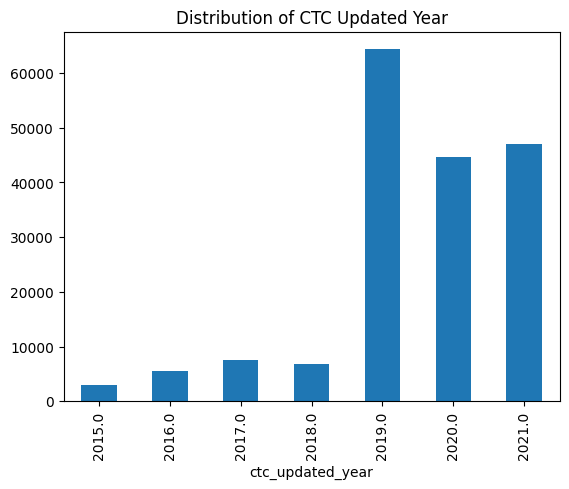

In [ ]:
df_new['ctc_updated_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of CTC Updated Year')
plt.ylabel('')
plt.show()

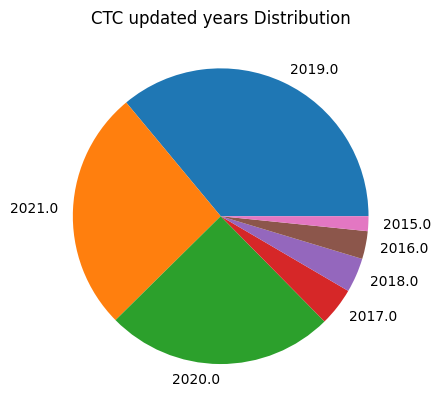

In [ ]:
df_new['ctc_updated_year'].value_counts(normalize=True).plot(kind='pie')
plt.title('CTC updated years Distribution')
plt.ylabel('')
plt.show()

1. **Recent Data Dominates**: The majority of the entries are from recent years, with **2019** having the highest count at **64,350**, followed by **2021** (**47,091**) and **2020** (**44,619**). This suggests increased activity or better data recording in these years.  

2. **Steady Decline in Older Years**: Data decreases significantly in earlier years, with **2017** (7,461) and prior years having notably lower counts.  

3. **Low Representation for Older Years**: Years like **2015** and **2016** have minimal representation, indicating either fewer learners or incomplete historical data.  

4. **Focus on Recent Trends**: The data skew toward recent years can guide analysis to focus on the latest trends in CTC updates for actionable insights.  

5. **Potential Outliers**: The distribution suggests the need to ensure data from earlier years is complete and consistent for meaningful comparisons over time.

### *ORGYEAR*

In [ ]:
df_new['orgyear'].value_counts()

orgyear
2018.0    21572
2016.0    20168
2017.0    20014
2019.0    19144
2015.0    18183
          ...  
209.0         1
208.0         1
1981.0        1
1973.0        1
200.0         1
Name: count, Length: 77, dtype: int64

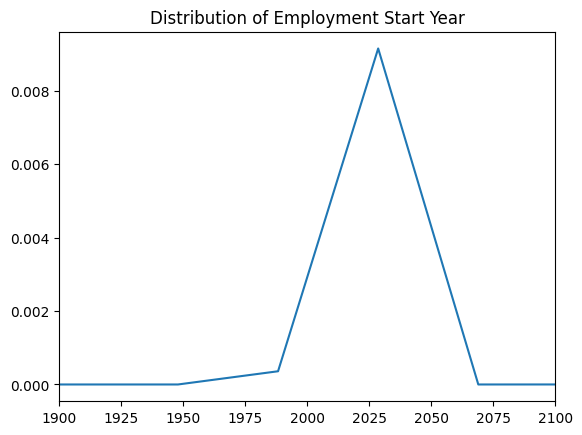

In [ ]:
# @title *Detecting Outliers*
df_new['orgyear'].plot(kind='kde')
plt.xlim(1900,2100)
plt.title('Distribution of Employment Start Year')
plt.ylabel('')
plt.show()

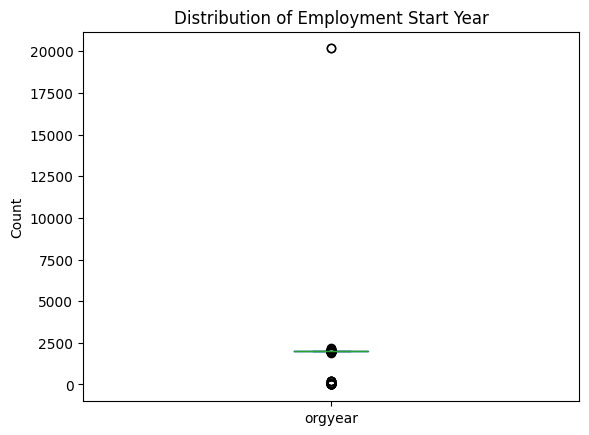

In [ ]:
df_new['orgyear'].plot(kind='box')
plt.title('Distribution of Employment Start Year')
plt.ylabel('Count')
plt.show()

There are outliers in the orgyear column infact some values are pure data entry issues.
No person can work from 1900 to 2020 or after present dates data is also given, which must be treated.







In [ ]:
# @title *Handling Outliers*
df_new['joining_year']=df_new['orgyear']
df_new.loc[(df_new['joining_year']>2021) |(df_new['joining_year']<1995),'joining_year']=np.nan

In [ ]:
df_new.joining_year.isna().sum()

1599

In [ ]:
# finding if we have orgyear for same learner in data
min_org_year=df_new.groupby('email_hash')['joining_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

company_hash          39
email_hash             0
orgyear               84
ctc                    0
ctc_updated_year       0
job_category           0
joining_year        1529
dtype: int64

Assuming the joining year as the mean value of orgyear for whom we dont have correct values.

In [ ]:
min_org_year=df_new['joining_year'].mean()
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

company_hash        39
email_hash           0
orgyear             84
ctc                  0
ctc_updated_year     0
job_category         0
joining_year         0
dtype: int64

- I am assuming the minimum joining year of a company is 1995 as 2021 is recent year and minimum is 2015 in data and a learner with such high experience(25-26) doesnt seems reasonable. Also there is incorrect entry in data, so clippping data to 1995.

In [ ]:
# dropping orgyear after handling outliers and having a new column joining_year from it
df_new.drop('orgyear',axis=1,inplace=True)

In [ ]:
df_new['joining_year'].value_counts()

joining_year
2018.000000    21584
2016.000000    20177
2017.000000    20022
2019.000000    19160
2015.000000    18184
2014.000000    14891
2013.000000    11077
2020.000000    11059
2012.000000     9398
2011.000000     7062
2010.000000     5132
2009.000000     3362
2021.000000     3102
2008.000000     2414
2007.000000     1993
2006.000000     1854
2005.000000     1657
2015.020808     1529
2004.000000     1308
2003.000000      906
2001.000000      641
2002.000000      613
2000.000000      454
1999.000000      310
1998.000000      265
1997.000000      217
1996.000000      125
1995.000000       83
Name: count, dtype: int64

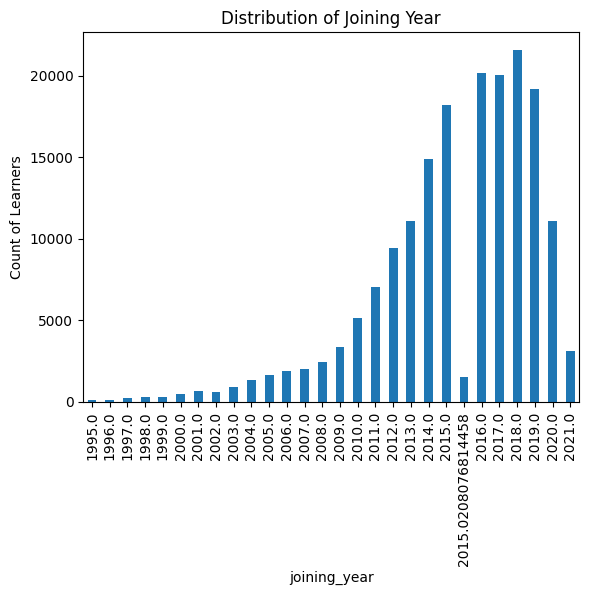

In [ ]:
df_new['joining_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

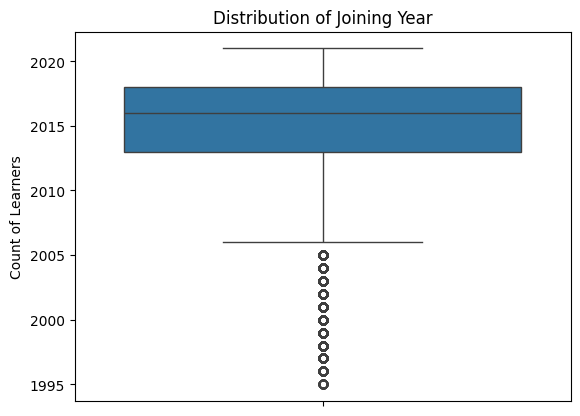

In [ ]:
sns.boxplot(df_new['joining_year'])
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

The lower bound years are still showing as outlier years, as per Boxplot Method.

1. **Peak Joining Years**: The majority of learners joined their companies in recent years, with **2018 (21,614)**, **2016 (20,182)**, and **2017 (20,050)** showing the highest counts. This indicates a trend of high hiring activity during these years.  

2. **Decline in Recent Years**: A noticeable drop is observed in **2020 (11,510)** and **2021 (3,829)**, likely due to the pandemic's impact on hiring trends.

3. **Steady Decline Over Time**: Joining counts consistently decrease as we go further back in time, reflecting the natural attrition of employees and fewer records of older joining years.

4. **Early 2000s Representation**: Learner counts drop sharply from **2001 (641)** to the late 1990s, indicating limited workforce longevity or incomplete data for earlier years.

5. **Pre-2000 Minimal Data**: Very few learners joined before **2000**, with counts like **454 (2000)** and **310 (1999)**, likely representing only senior employees or data constraints.
<br><br>
### *CTC*

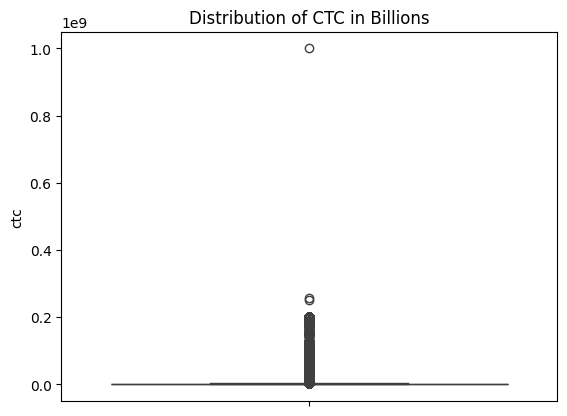

In [ ]:
sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC in Billions')
plt.show()

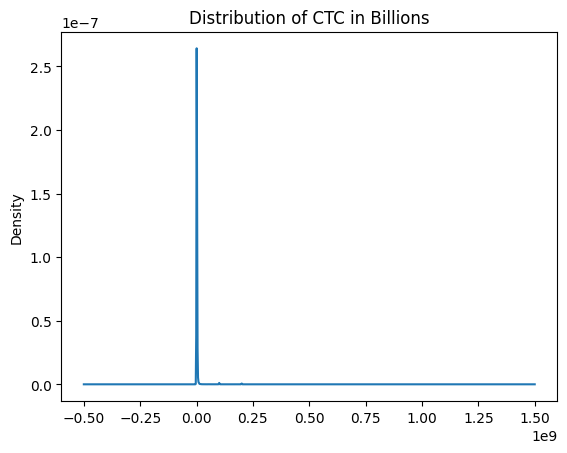

In [ ]:
df_new['ctc'].plot(kind='kde')
plt.title('Distribution of CTC in Billions')
plt.show()

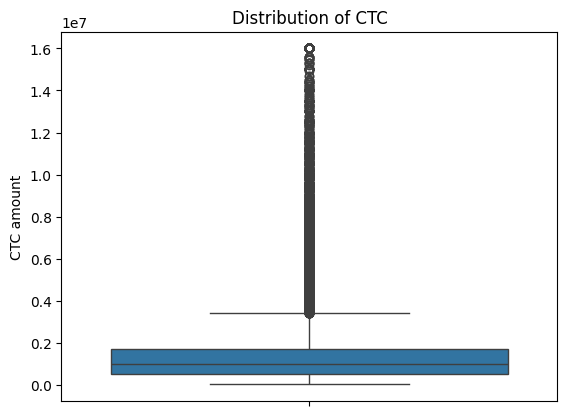

In [ ]:
# @title *Treating Outliers*
df_new['ctc']=np.clip(df_new['ctc'],np.quantile(df_new['ctc'],0.01),np.quantile(df_new['ctc'],0.99))

sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC')
plt.ylabel('CTC amount')
plt.show()

- Outliers are still there but much better than before distribution.
- Learners with less than 2 Lakhs of many are the most in the Scaler.
- while there are lesser number for learners having ctc of

In [ ]:
pd.cut(df_new['ctc'],bins=[0,200000,400000,600000,800000,1000000,2000000,100000000,200000000]).value_counts().sort_index()

ctc
(0, 200000]               10232
(200000, 400000]          18747
(400000, 600000]          24134
(600000, 800000]          23454
(800000, 1000000]         18931
(1000000, 2000000]        49633
(2000000, 100000000]      33448
(100000000, 200000000]        0
Name: count, dtype: int64

1. **High-Earning Professionals**: The **₹10,00,000–₹20,00,000** bracket has the highest count (**49,633**), showing a significant proportion of learners in mid-to-senior level positions.

2. **Top Tier Earners**: Learners in the **₹20,00,000–₹1,00,000,000** bracket total **33,448**, indicating a considerable number of high-income professionals.

3. **Entry-Level Representation**: The lower brackets, such as **₹0–₹2,00,000** (**10,232**) and **₹2,00,000–₹4,00,000** (**18,747**), represent entry-level professionals or individuals at the start of their careers.

4. **Mid-Range CTC Dominates**: The majority of learners fall within the **₹4,00,000–₹6,00,000** range (**24,134**), followed closely by the **₹6,00,000–₹8,00,000** range (**23,454**). This suggests a strong representation of early to mid-level professionals and an opportunity to cater to professionals looking to upskill for career advancement into higher-paying roles. .  

5. **Higher CTC Learners Decrease**: The count drops significantly for the **₹8,00,000–₹10,00,000** range (**18,931**), indicating fewer learners in higher salary brackets.  

6. **Ultra-High CTC Learners**: The presence of **610** learners earning more than **₹10 crore** is notable, showcasing the reach of the platform among top-tier professionals or C-suite executives. Though they are clipped as they may impact the further clustering and analysis.

<br><br>
### *Data Validation*

In [ ]:
df_new[df_new['ctc_updated_year']<df_new['joining_year']]

company_hash  \
8                  utqoxontzn ojontbo   
17                               puxn   
40                     rvqotz  nghmqg   
48                rgfto wgbuvzxto xzw   
56          axztqg xzzgcvnxgz ucn rna   
...                               ...   
205786                      wyvqstmtt   
205795  qtrxvzwt lxg xzegwgbb rxbxnta   
205796                 zgn vuurxwvmrt   
205801                 zgn vuurxwvmrt   
205834         wyvqntq wgbbhzxwvnxgzo   

                                               email_hash       ctc  \
8       e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...    450000   
17      26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...   1400000   
40      96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...   2500000   
48      7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...   3010000   
56      3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...    700000   
...                                                   ...       ...   
205786  faa7431795fe5a112893353d47ceb114be2ebdc1f0dff1...   2200000   
205795  aab90adb3d4cdf6a3c2c7a106ce58ec53a706aa082bc11...    700000   
205796  e5ef043e885543843a2ffc11e18ba1662194512592b442...  16000000   
205801  03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...   1800000   
205834  7dd3d0d543874c1250af3d16266923a77c0b824540d89a...    100000   

        ctc_updated_year         job_category  joining_year  
8                 2019.0              Unknown        2020.0  
17                2019.0              Unknown        2020.0  
40                2020.0  Non Technical Roles        2021.0  
48                2019.0     Backend Engineer        2020.0  
56                2019.0    Frontend Engineer        2020.0  
...                  ...                  ...           ...  
205786            2019.0              Unknown        2020.0  
205795            2016.0              Unknown        2017.0  
205796            2019.0              Unknown        2021.0  
205801            2016.0              Unknown        2019.0  
205834            2019.0              Unknown        2020.0  

[7083 rows x 6 columns]

There are **7082** rows where ctc updated year is less than joining year. It doesnt makes sense as no person can get ctc before joining the organisation. So, cleaning that data.

In [ ]:
df_new['ctc_updated_year'] = df_new.apply(lambda x: x['joining_year'] if x['ctc_updated_year'] <
                    x['joining_year'] else x['ctc_updated_year'], axis=1)

# <font color ='blue'> ***Feature Engineering***

In [ ]:
df_new['experience_years']=df_new['ctc_updated_year']-df_new['joining_year']
df_new['experience_years'].value_counts().sort_index()

experience_years
0.000000     19621
0.979192         5
1.000000     19552
1.979192        28
2.000000     23914
2.979192        30
3.000000     22757
3.979192       281
4.000000     20154
4.979192       447
5.000000     16703
5.979192       737
6.000000     12990
7.000000     10113
8.000000      7513
9.000000      5657
10.000000     4041
11.000000     2927
12.000000     2252
13.000000     1843
14.000000     1618
15.000000     1309
16.000000     1005
17.000000      748
18.000000      576
19.000000      529
20.000000      471
21.000000      291
22.000000      212
23.000000      141
24.000000       78
25.000000       22
26.000000       14
Name: count, dtype: int64

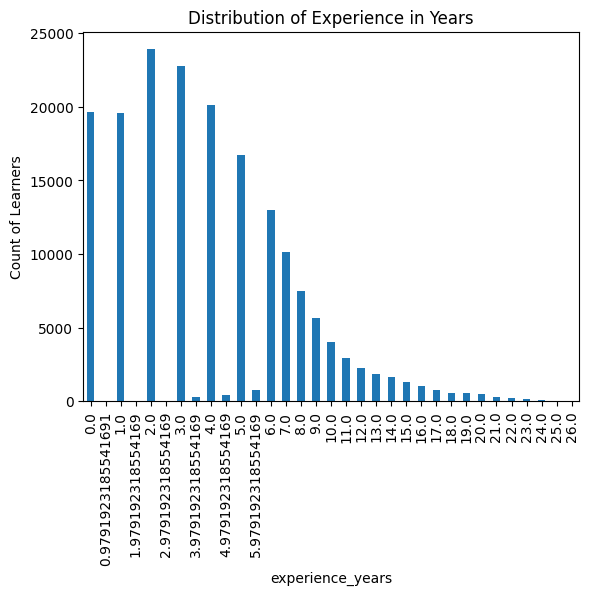

In [ ]:
df_new['experience_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Experience in Years')
plt.ylabel('Count of Learners')
plt.show()


1. **Entry-Level Dominance**: A significant proportion of learners have **0–2 years of experience** (**64,615 combined**), indicating strong participation from fresh graduates or early-career professionals.

2. **Mid-Level Professionals**: The **3–6 years of experience** bracket accounts for **72,604 learners**, representing individuals likely looking to transition into mid-level roles or upscale their skills for growth.

3. **Steady Decline with Seniority**: Learner count progressively decreases as years of experience increase, showing fewer participants in senior-level roles.

4. **Experienced Learners**: There are **8,788 learners** with **10–15 years of experience**, indicating interest from seasoned professionals seeking specialization or career shifts.

5. **Niche Segment**: The **16+ years of experience** group is a smaller but significant cohort, with **4,118 learners**, often C-suite or leadership professionals aiming to update skills or mentor others.

In [ ]:
df_new = df_new.sort_values(by=['email_hash', 'ctc_updated_year','ctc'])
df_new['promotion_status'] = df_new.groupby('email_hash')['ctc'].diff().gt(0).fillna(False).astype('int')
df_new

company_hash  \
84638                           bxwqgogen   
506                          nqsn axsxnvr   
51568                               gunhb   
53844               bxwqgotbx wgqugqvnxgz   
138229                       fvrbvqn rvmo   
...                                   ...   
39637            tqxwoogz ogenfvqt wvbuho   
185749                            trnqvcg   
148315  znn avnv srgmvr atrxctqj otqcxwto   
14106                     zwq wgqugqvnxgz   
116860                      sgrabvz ovwyo   

                                               email_hash      ctc  \
84638   00003288036a44374976948c327f246fdbdf0778546904...  3500000   
506     0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   250000   
51568   0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  1300000   
53844   000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  2000000   
138229  00014d71a389170e668ba96ae8e1f9d991591acc899025...  3400000   
...                                                   ...      ...   
39637   fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...  3529999   
185749  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...  1600000   
148315  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   900000   
14106   ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   700000   
116860  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...  1500000   

        ctc_updated_year                   job_category  joining_year  \
84638             2019.0               Backend Engineer        2012.0   
506               2020.0               Backend Engineer        2013.0   
51568             2021.0            Product Development        2021.0   
53844             2021.0            Product Development        2004.0   
138229            2018.0                        Unknown        2009.0   
...                  ...                            ...           ...   
39637             2019.0  Quality Assurance and Testing        2004.0   
185749            2018.0                        Unknown        2015.0   
148315            2019.0          IT and Cyber Security        2014.0   
14106             2020.0            Product Development        2020.0   
116860            2021.0            Product Development        2018.0   

        experience_years  promotion_status  
84638                7.0                 0  
506                  7.0                 0  
51568                0.0                 0  
53844               17.0                 0  
138229               9.0                 0  
...                  ...               ...  
39637               15.0                 0  
185749               3.0                 0  
148315               5.0                 0  
14106                0.0                 0  
116860               3.0                 0  

[178579 rows x 8 columns]

In [ ]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts()

promotion_status
0    145641
1      7802
Name: count, dtype: int64

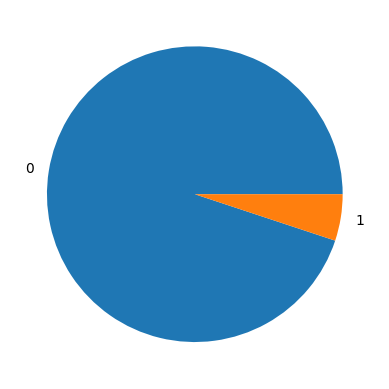

In [ ]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts(normalize=True).plot(kind='pie')
plt.ylabel('')
plt.show()

1. **Promotion Status**: The majority of learners, **145,641** (approximately **95.2%**), have a promotion status of **0**, indicating that they have not received a promotion within their current role or organization during their time with Scaler.

2. **Promoted Learners**: A smaller segment, **7,802** (around **4.8%**), has achieved a promotion (status **1**), suggesting that Scaler’s programs are effective for a portion of the learners in advancing their careers.


In [ ]:
df_new.duplicated().sum()

132

In [ ]:
df_new.drop_duplicates(inplace=True)


# <font color='blue'> *Bivariate Analysis*

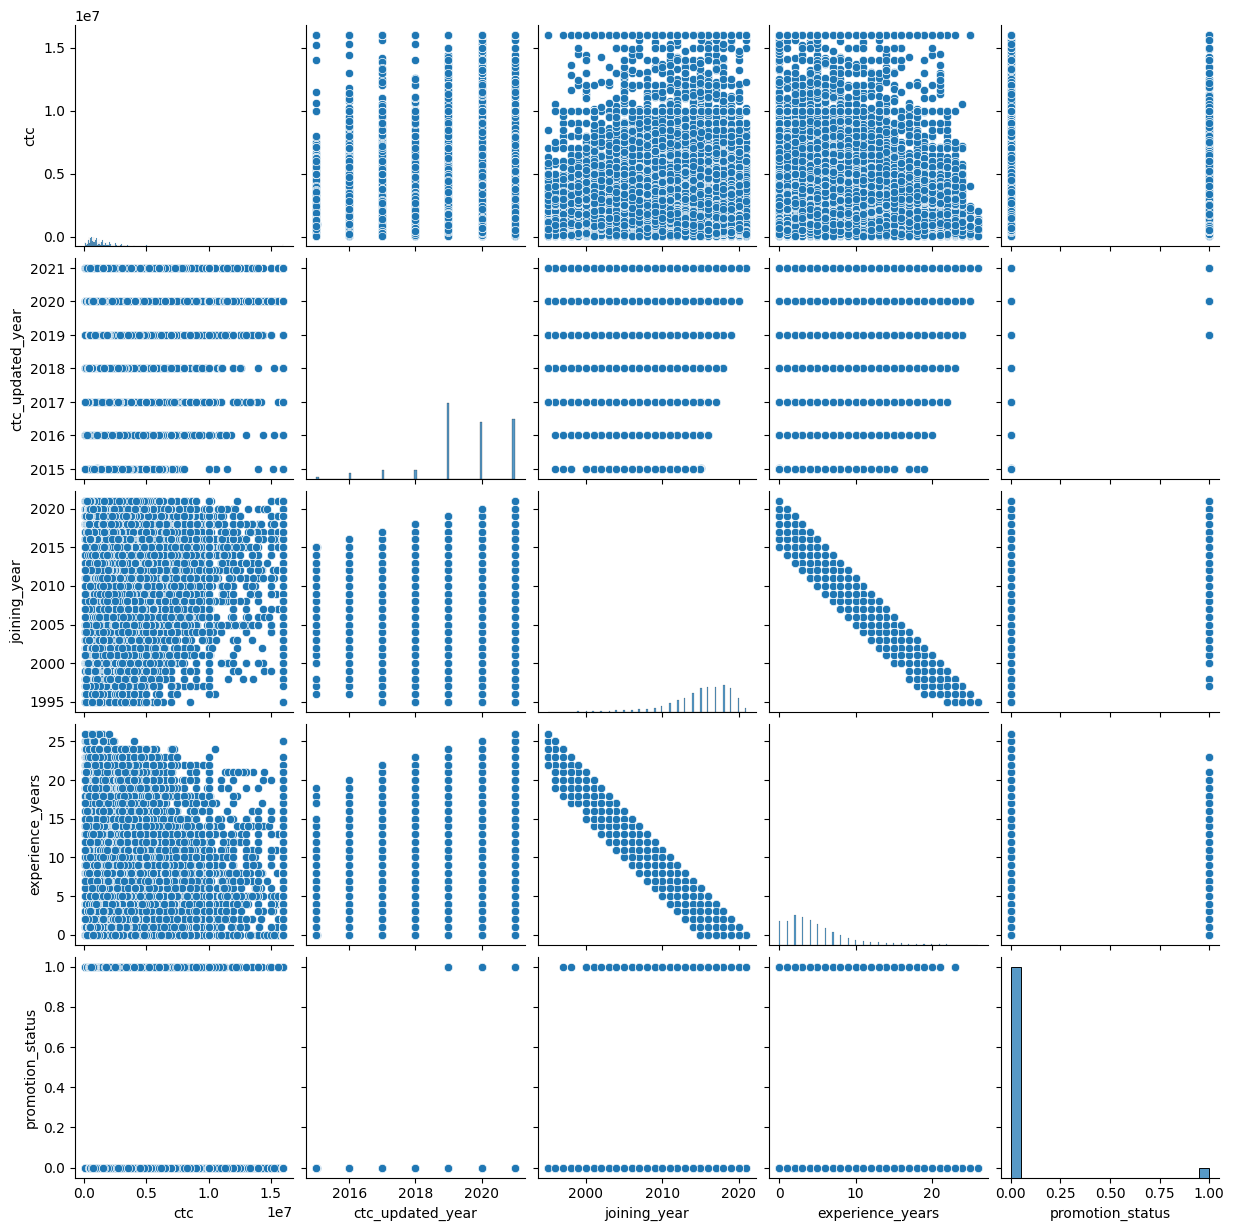

In [ ]:
sns.pairplot(df_new)
plt.show()

- Learners who joined before doesnt have ctc above 10lakh+.
- There are instances where people with high experience have low ctc as compared to people with less experience.
- Promotoin and ctc doesnt showing any relation which is quite ambiguous.
- Those who joined late updated their ctc regularly.
- joining year and experince years are negatively correlated, which makes sense too. Removing joining years.
- Promotion is not showing any relation with experience years.

In [ ]:
df_new.drop('joining_year',axis=1,inplace=True)
df_new.reset_index(drop=True,inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178447 entries, 0 to 178446
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      178408 non-null  object 
 1   email_hash        178447 non-null  object 
 2   ctc               178447 non-null  int64  
 3   ctc_updated_year  178447 non-null  float64
 4   job_category      178447 non-null  object 
 5   experience_years  178447 non-null  float64
 6   promotion_status  178447 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 9.5+ MB


# <FONT COLOR='BLUE'> *Statistical Summary*

In [ ]:
df_new.describe().T

count          mean           std      min       25%  \
ctc               178447.0  1.486095e+06  1.961600e+06  35000.0  550000.0   
ctc_updated_year  178447.0  2.019549e+03  1.289168e+00   2015.0    2019.0   
experience_years  178447.0  4.532019e+00  3.931442e+00      0.0       2.0   
promotion_status  178447.0  4.372167e-02  2.044757e-01      0.0       0.0   

                       50%        75%         max  
ctc               990000.0  1700000.0  16000000.0  
ctc_updated_year    2020.0     2021.0      2021.0  
experience_years       4.0        6.0        26.0  
promotion_status       0.0        0.0         1.0

1. **CTC (Cost-to-Company)**:
   - The **mean CTC** is approximately **₹1.49 million**, but the high **standard deviation (₹1.96 million)** indicates significant variation in salaries across learners.
   - The **median CTC (₹990,000)** is notably lower than the mean, suggesting a right-skewed distribution with a few high earners inflating the average.
   - Salaries range from **₹35,000** (minimum) to **₹16 million** (maximum), indicating learners from entry-level to senior leadership roles.

2. **CTC Updated Year**:
   - The majority of salary updates occurred between **2019 and 2021**, as indicated by the **25th percentile (2019)**, median (2020), and **75th percentile (2021)**.
   - This reflects the dataset's recency and focus on current salary trends.

3. **Experience Years**:
   - The average experience is **4.53 years**, with a **standard deviation of 3.93 years**, suggesting that most learners are early to mid-career professionals.
   - The range of experience spans from **0 years (freshers)** to **26 years**, showing a diverse learner base across all career stages.
   - The **median experience (4 years)** indicates a concentration of learners in the early to mid-career bracket.

4. **Promotion Status**:
   - The mean value for promotion status is **0.0437**, showing that approximately **4.37%** of learners have been promoted, aligning with earlier observations.
   - The high concentration at **0** (as reflected by the 25th, 50th, and 75th percentiles) confirms that most learners have not achieved promotions.


In [ ]:
df_new.describe(include='object').T

count  unique  \
company_hash  178408   37299   
email_hash    178447  153443   
job_category  178447      23   

                                                            top   freq  
company_hash                          nvnv wgzohrnvzwj otqcxwto   6544  
email_hash    3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...      9  
job_category                                   Backend Engineer  46710

1. **Company Hash**:
   - There are **178,408 entries** spread across **37,299 unique companies**, indicating significant representation from diverse organizations.
   - The most frequent company (`nvnv wgzohrnvzwj otqcxwto`) appears **6,544 times**, suggesting it has the largest learner base, potentially due to a large workforce or active participation in upskilling programs.

2. **Email Hash**:
   - **153,443 unique email hashes** out of **178,447 entries** indicate that some learners have participated multiple times or may have duplicate records.
   - The most common email hash appears **9 times**, which may warrant a review for potential duplicates or multiple entries by the same individual.

3. **Job Category**:
   - There are **23 unique job categories**, with **Backend Engineer** being the most common, accounting for **46,710 entries**. This highlights a significant focus on backend development roles among learners.

<br><br>
   # <font size =6>*Data Preprocessing*

In [ ]:
dff=df_new.copy()
dff

company_hash  \
0                               bxwqgogen   
1                            nqsn axsxnvr   
2                                   gunhb   
3                   bxwqgotbx wgqugqvnxgz   
4                            fvrbvqn rvmo   
...                                   ...   
178442           tqxwoogz ogenfvqt wvbuho   
178443                            trnqvcg   
178444  znn avnv srgmvr atrxctqj otqcxwto   
178445                    zwq wgqugqvnxgz   
178446                      sgrabvz ovwyo   

                                               email_hash      ctc  \
0       00003288036a44374976948c327f246fdbdf0778546904...  3500000   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   250000   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...  1300000   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...  2000000   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...  3400000   
...                                                   ...      ...   
178442  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...  3529999   
178443  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...  1600000   
178444  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   900000   
178445  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   700000   
178446  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...  1500000   

        ctc_updated_year                   job_category  experience_years  \
0                 2019.0               Backend Engineer               7.0   
1                 2020.0               Backend Engineer               7.0   
2                 2021.0            Product Development               0.0   
3                 2021.0            Product Development              17.0   
4                 2018.0                        Unknown               9.0   
...                  ...                            ...               ...   
178442            2019.0  Quality Assurance and Testing              15.0   
178443            2018.0                        Unknown               3.0   
178444            2019.0          IT and Cyber Security               5.0   
178445            2020.0            Product Development               0.0   
178446            2021.0            Product Development               3.0   

        promotion_status  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
178442                 0  
178443                 0  
178444                 0  
178445                 0  
178446                 0  

[178447 rows x 7 columns]

In [ ]:
# @title *Label Encoding*
le=LabelEncoder()
dff['job_category_label']=le.fit_transform(dff['job_category'])
dff.drop(columns=['job_category'],inplace=True)
dff.head()

company_hash                                         email_hash  \
0              bxwqgogen  00003288036a44374976948c327f246fdbdf0778546904...   
1           nqsn axsxnvr  0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2                  gunhb  0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3  bxwqgotbx wgqugqvnxgz  000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4           fvrbvqn rvmo  00014d71a389170e668ba96ae8e1f9d991591acc899025...   

       ctc  ctc_updated_year  experience_years  promotion_status  \
0  3500000            2019.0               7.0                 0   
1   250000            2020.0               7.0                 0   
2  1300000            2021.0               0.0                 0   
3  2000000            2021.0              17.0                 0   
4  3400000            2018.0               9.0                 0   

   job_category_label  
0                   1  
1                   1  
2                  15  
3                  15  
4                  22

## ***KNN Impution***

In [ ]:
pipe=Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=5))])
dff_knn=pd.DataFrame(pipe.fit_transform(dff.drop(columns=['email_hash','company_hash'])),columns=dff.columns.difference(['email_hash','company_hash']))

In [ ]:
dff_knn.isna().sum()

ctc                   0
ctc_updated_year      0
experience_years      0
job_category_label    0
promotion_status      0
dtype: int64

In [ ]:
dff_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178579 entries, 0 to 178578
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ctc                 178579 non-null  float64
 1   ctc_updated_year    178579 non-null  float64
 2   experience_years    178579 non-null  float64
 3   index               178579 non-null  float64
 4   job_category_freq   178579 non-null  float64
 5   job_category_label  178579 non-null  float64
 6   joining_year        178579 non-null  float64
dtypes: float64(7)
memory usage: 9.5 MB


In [ ]:
df_cleaned=pd.concat([dff_knn,dff[['email_hash','company_hash']]],axis=1)
df_cleaned[df_cleaned['company_hash'].isna()]

ctc  ctc_updated_year  experience_years  job_category_label  \
5469   -0.400743          1.125354         -0.135325           -0.213824   
10335   0.160026         -1.201735         -1.152766           -0.213824   
11752  -0.630148         -0.426038         -0.898405           -0.213824   
15684  -0.400743         -2.753127         -1.152766           -0.213824   
17344  -0.604658          1.125354         -0.898405           -0.213824   
18632   0.363941          1.125354          0.373396           -0.213824   
44541  -0.690303         -1.977431          1.390837           -0.213824   
52489   0.261983          1.125354          1.136477           -0.213824   
56201  -0.502700         -0.426038         -1.152766           -0.213824   
66091  -0.451722         -0.426038          0.119036           -0.213824   
71178  -0.502700         -0.426038         -0.898405           -0.213824   
76973  -0.451722          0.349658         -0.644045           -0.213824   
90596   0.312962          1.125354          1.136477           -0.213824   
91917  -0.604658         -1.201735         -1.152766           -0.213824   
94581  -0.553679          1.125354          0.882117           -0.213824   
98061  -0.655637          0.349658         -0.898405           -0.213824   
99162  -0.640344          1.125354         -0.389685           -0.213824   
100219  7.399033          0.349658          0.113743           -0.213824   
105929 -0.145848          1.125354          1.390837           -0.213824   
111196 -0.553679          1.125354         -0.135325           -0.213824   
114966 -0.701518         -2.753127         -0.898405           -0.213824   
116587 -0.145848         -1.201735         -0.898405           -0.213824   
117049 -0.145848         -0.426038         -1.152766           -0.213824   
119096 -0.270237         -1.201735         -1.152766           -0.213824   
123714 -0.451722          0.349658         -1.152766           -0.213824   
125925  0.058068          1.125354          0.882117            4.676746   
132219  0.261983          0.349658          1.390837           -0.213824   
135068  0.261983         -0.426038         -1.152766           -0.213824   
139466 -0.247806          1.125354          0.627756           -0.213824   
140471 -0.298785          1.125354         -1.152766           -0.213824   
142929 -0.247806         -0.426038          2.153918           -0.213824   
143103 -0.604658          1.125354         -0.135325           -0.213824   
143830  0.261983         -1.201735         -1.152766           -0.213824   
144908 -0.349764          0.349658         -1.152766           -0.213824   
150482 -0.349764         -0.426038         -0.135325           -0.213824   
151765 -0.293687         -0.426038          0.882117           -0.213824   
163287 -0.604658          1.125354         -0.389685           -0.213824   
170520  0.618836         -0.426038         -1.152766           -0.213824   
170685 -0.451722          1.125354          0.373396           -0.213824   

        promotion_status                                         email_hash  \
5469            0.635131  07a60d6e853852471b0963b78a0a3074532572a2580864...   
10335           1.591909  0e781c3797c031c6aad2fa3d97c82773624a5da9a35de9...   
11752           0.361766  1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...   
15684           1.591909  1606fcb8a2b3e4b242df4ee71190194fc556cf0d548616...   
17344           0.361766  18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...   
18632           1.591909  1a5f329f97cdac513d7e33b5f8705e46053595ef6254c9...   
44541           1.591909  3fd7b50dc84e8b2493f097c6fc33c8abed19107ed0b1d3...   
52489           1.591909  4baf80fe2b9513f2f1d17d90f26071bd21f4a89d865fa1...   
56201          -0.868376  50f183667fd8a115dda5aa345988b314e1d98a3d937ea0...   
66091           1.591909  5ef6071f5c390f317dfa60f7aadb9ee7a1abc92aaa02fc...   
71178           0.361766  66263f4942b046c67ae6e2570e7825c03792631a0b13f1...   
76973          -1.278424

Though Knn imputation may be helping in imputating some **NAN** values but I already filled the job_position using mode job_position of respective learners and remaining with null and orgyear with mode of that learner orgyear.
So, to keep the data in original form rather than scaled. I am prefering the data to drop those 39 **company_hash** null data rows.

In [ ]:
df_new.dropna(inplace=True)
df_new.isna().sum()

company_hash        0
email_hash          0
ctc                 0
ctc_updated_year    0
job_category        0
experience_years    0
promotion_status    0
dtype: int64

In [ ]:
df_new.shape

(178408, 7)

## *Grouping Data at learner, company and job category level*

In [ ]:
agg_fun={'ctc':'mean',
           'ctc_updated_year':'max',
           'experience_years':'max',
         'promotion_status':'max'}

df_grp=df_new.groupby(['email_hash','company_hash','job_category']).agg(agg_fun).reset_index()
df_grp

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                             company_hash                   job_category  \
0                               bxwqgogen               Backend Engineer   
1                            nqsn axsxnvr               Backend Engineer   
2                                   gunhb            Product Development   
3                   bxwqgotbx wgqugqvnxgz            Product Development   
4                            fvrbvqn rvmo                        Unknown   
...                                   ...                            ...   
172272           tqxwoogz ogenfvqt wvbuho  Quality Assurance and Testing   
172273                            trnqvcg                        Unknown   
172274  znn avnv srgmvr atrxctqj otqcxwto          IT and Cyber Security   
172275                    zwq wgqugqvnxgz            Product Development   
172276                      sgrabvz ovwyo            Product Development   

              ctc  ctc_updated_year  experience_years  promotion_status  
0       3500000.0            2019.0               7.0                 0  
1        250000.0            2020.0               7.0                 0  
2       1300000.0            2021.0               0.0                 0  
3       2000000.0            2021.0              17.0                 0  
4       3400000.0            2018.0               9.0                 0  
...           ...               ...               ...               ...  
172272  3529999.0            2019.0              15.0                 0  
172273  1600000.0            2018.0               3.0                 0  
172274   900000.0            2019.0               5.0                 0  
172275   700000.0            2020.0               0.0                 0  
172276  1500000.0            2021.0               3.0                 0  

[172277 rows x 7 columns]

In [ ]:
df_grp.nunique()

email_hash          153411
company_hash         37299
job_category            23
ctc                   3153
ctc_updated_year         8
experience_years        33
promotion_status         2
dtype: int64

In [ ]:
df_grp.groupby('email_hash')['company_hash'].nunique().value_counts()

company_hash
1    146550
2      6860
3         1
Name: count, dtype: int64

1. **Majority Stay with One Company**:
   - **146,550 learners** (overwhelming majority) are associated with only **one company**. This indicates stability in employment or a focus on upskilling within their current organization.

2. **Few Work with Two Companies**:
   - Only **6,860 learners** are associated with **two companies**, which could suggest job changes.

3. **Rare Cases of Triple Movement**:
   - Only **1 learner** is associated with **three companies**, indicating rare cases of high mobility or unique employment patterns.

<Axes: >

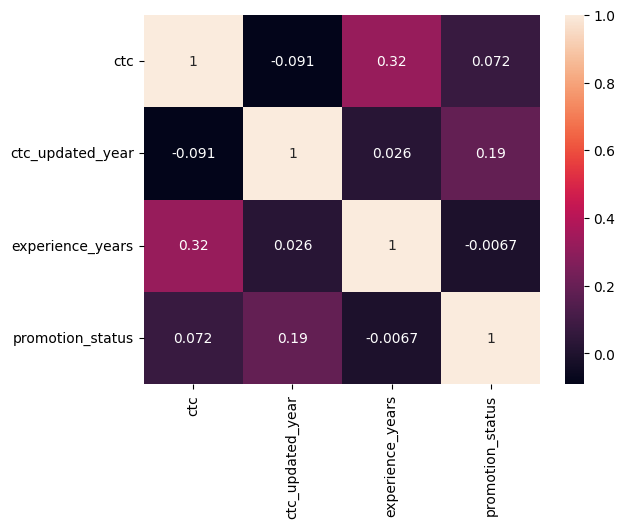

In [ ]:
num_col=df_grp.select_dtypes(include='number')
sns.heatmap(num_col.corr(method='spearman'),annot=True)

- Not much correlation is there between columns.
- Except, **0.32** between experience and ctc and **0.19** between ctc_updated_year and promotion.

# <font color='blue' size=10> ***Clustering***

## *Manual Clustering based on company, job position and years of experience*

In [ ]:
dict_comp=df_grp.groupby('company_hash')['email_hash'].nunique().to_dict()
df_grp['comp_emp']=df_grp['company_hash'].map(dict_comp)

In [ ]:
# df_new['company_hash_clean']=df_new['company_hash'].mask(df_new['company_hash'].map(df_new['company_hash'].value_counts())<=5,'Small_companies')
df_grp['company_hash_clean']=df_grp['company_hash'].mask(df_grp['comp_emp']<=5,'Small companies')
df_grp.drop('comp_emp',axis=1,inplace=True)
df_grp['company_hash_clean'].value_counts()

company_hash_clean
Small companies              47623
nvnv wgzohrnvzwj otqcxwto     6128
xzegojo                       4007
vbvkgz                        2969
zgn vuurxwvmrt vwwghzn        2453
                             ...  
ho tzsxzttqxzs wgbuvzj           6
tzuyvot tztqsj                   6
atrxctqj ytqg                    6
hzxrgs                           6
pttunqhwpxz                      6
Name: count, Length: 2574, dtype: int64

In [ ]:
df_summ=df_grp.groupby(['company_hash_clean','job_category','experience_years'])['ctc'].describe()
df_summ

count  \
company_hash_clean job_category                   experience_years          
1bs                Backend Engineer               0.00               2.00   
                                                  1.00               3.00   
                                                  2.00               2.00   
                                                  3.00               5.00   
                                                  4.00               6.00   
...                                                                   ...   
zxztrtvuo          Product Development            4.00               1.00   
                   Support & Maintenance Engineer 4.00               1.00   
                   Unknown                        0.00               6.00   
                                                  1.00               1.00   
                                                  6.00               1.00   

                                                                         mean  \
company_hash_clean job_category                   experience_years              
1bs                Backend Engineer               0.00              900000.00   
                                                  1.00             1133333.33   
                                                  2.00             1037500.00   
                                                  3.00             1252000.00   
                                                  4.00             2333333.33   
...                                                                       ...   
zxztrtvuo          Product Development            4.00             1200000.00   
                   Support & Maintenance Engineer 4.00             1200000.00   
                   Unknown                        0.00              608333.33   
                                                  1.00              750000.00   
                                                  6.00             1275000.00   

                                                                         std  \
company_hash_clean job_category                   experience_years             
1bs                Backend Engineer               0.00             141421.36   
                                                  1.00             115470.05   
                                                  2.00             194454.36   
                                                  3.00             376523.57   
                                                  4.00             899236.71   
...                                                                      ...   
zxztrtvuo          Product Development            4.00                   NaN   
                   Support & Maintenance Engineer 4.00                   NaN   
                   Unknown                        0.00             231120.46   
                                                  1.00                   NaN   
                                                  6.00                   NaN   

                                                                          min  \
company_hash_clean job_category                   experience_years              
1bs                Backend Engineer               0.00              800000.00   
                                                  1.00             1000000.00   
                                                  2.00              900000.00   
                                                  3.00              750000.00   
                                                  4.00             1200000.00   
...                                                                       ...   
zxztrtvuo          Product Development            4.00             1200000.00   
                   Support & Maintenance Engineer 4.00             1200000.00   
                   Unknown                        0.00              400000.00   
                                                  1.00              750000.00   

In [ ]:
df_cje=df_grp.drop(columns=['company_hash']).merge(df_summ,on=['company_hash_clean','job_category','experience_years'],how='left')

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_cje

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00           2019.00   
1                    Backend Engineer  250000.00           2020.00   
2                 Product Development 1300000.00           2021.00   
3                 Product Development 2000000.00           2021.00   
4                             Unknown 3400000.00           2018.00   
...                               ...        ...               ...   
172272  Quality Assurance and Testing 3529999.00           2019.00   
172273                        Unknown 1600000.00           2018.00   
172274          IT and Cyber Security  900000.00           2019.00   
172275            Product Development  700000.00           2020.00   
172276            Product Development 1500000.00           2021.00   

        experience_years  promotion_status                 company_hash_clean  \
0                   7.00                 0                          bxwqgogen   
1                   7.00                 0                    Small companies   
2                   0.00                 0                              gunhb   
3                  17.00                 0              bxwqgotbx wgqugqvnxgz   
4                   9.00                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172272             15.00                 0                    Small companies   
172273              3.00                 0                    Small companies   
172274              5.00                 0  znn avnv srgmvr atrxctqj otqcxwto   
172275              0.00                 0                    zwq wgqugqvnxgz   
172276              3.00                 0                      sgrabvz ovwyo   

        count       mean        std        min        25%        50%  \
0       44.00 3066772.70 1661639.07   35000.00 2150000.00 3175000.00   
1      509.00 1799828.47 2254005.35   35000.00  900000.00 1400000.00   
2       12.00 1379250.00  528720.09  700000.00 1005000.00 1365500.00   
3        1.00 2000000.00        NaN 2000000.00 2000000.00 2000000.00   
4        6.00 2645333.33 1364921.49  222000.00 2212500.00 3150000.00   
...       ...        ...        ...        ...        ...        ...   
172272  16.00 1925624.88 1160137.56  110000.00 1000000.00 1650000.00   
172273 483.00 1021389.22 1802916.34   35000.00  400000.00  600000.00   
172274   3.00  716666.67  160727.51  600000.00  625000.00  650000.00   
172275   4.00 1700000.00 1568438.71  700000.00  700000.00 1050000.00   
172276  29.00 2653741.38  781394.39 1100000.00 2100000.00 2743500.00   

              75%         max  
0      4205000.00  6000000.00  
1      1900000.00 16000000.00  
2      1682500.00  2200000.00  
3      2000000.00  2000000.00  
4      3375000.00  4000000.00  
...           ...         ...  
172272 2987500.00  3529999.00  
172273 1000000.00 16000000.00  
172274  775000.00   900000.00  
172275 2050000.00  4000000.00  
172276 3200000.00  4000000.00  

[172277 rows x 15 columns]

In [ ]:
conditions=[df_cje['ctc']<df_cje['50%'],df_cje['ctc']<=df_cje['75%'],df_cje['ctc']>df_cje['75%']]
choices=[3,2,1]
df_cje['Designation']=np.select(conditions,choices)
df_cje['Designation'].value_counts()

Designation
2    72557
3    62211
1    37509
Name: count, dtype: int64

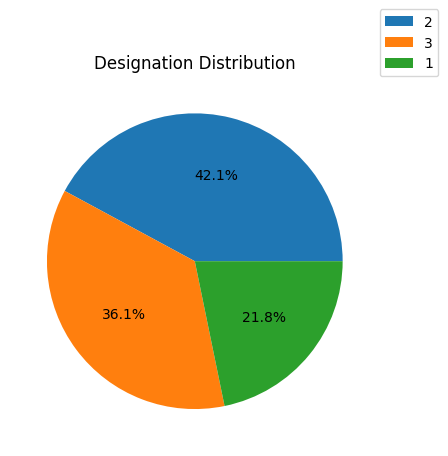

In [ ]:
plt.pie(df_cje['Designation'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_cje['Designation'].value_counts().index,loc=(1,1))
plt.title('Designation Distribution')
plt.show()

### *Clustering Analysis Based on Designation Groups*

1. **Cluster 1: High CTC (Designation 1)**  
   - **Size**: **37,509 employees**.  
   - **Characteristics**:
     - Represents employees earning the highest compensation within their companies, job categories, and experience levels.
     - Likely includes senior professionals, specialists, or employees in competitive industries.
   - **Opportunities**: Focus on leadership development, advanced technical skills, and cross-domain expertise to maintain their competitive edge.

2. **Cluster 2: Medium CTC (Designation 2)**  
   - **Size**: **72,557 employees** (largest cluster).  
   - **Characteristics**:
     - Comprises employees earning an average CTC compared to peers with similar roles and experience.
     - Likely includes mid-career professionals or those in stable roles with moderate growth potential.
   - **Opportunities**: Offer skill enhancement programs to help transition to higher-paying roles or leadership positions.

3. **Cluster 3: Low CTC (Designation 3)**  
   - **Size**: **62,211 employees**.  
   - **Characteristics**:
     - Represents employees earning below-average compensation.
     - Likely includes entry-level professionals or individuals in companies/roles with limited growth potential.
   - **Opportunities**: Upskilling and reskilling initiatives, with a focus on high-demand areas to boost career growth and transition into higher-paying clusters.

### Insights:
- **Cluster Imbalance**: The majority of employees are in Cluster 2, reflecting a normal distribution with a bias toward the middle.  
- **Growth Potential**: Cluster 3 (low CTC) offers the highest potential for growth through training and mentorship.  
- **High Performers**: Cluster 1, though smaller, represents the most valuable segment for advanced and niche program offerings.  
- **Strategic Focus**: Businesses and learning platforms can tailor programs to help Cluster 3 move into Cluster 2 and Cluster 2 transition into Cluster 1.

## *Manual Clustering based on company and job position*

In [ ]:
df_summ=df_grp.groupby(['company_hash_clean','job_category'])['ctc'].describe()
df_summ

count       mean  \
company_hash_clean job_category                                       
1bs                Backend Engineer                20.00 1556750.00   
                   Data Scientist                   2.00  950000.00   
                   Frontend Engineer                3.00  966666.67   
                   Internship                       1.00 1200000.00   
                   Management                       2.00 2500000.00   
...                                                  ...        ...   
zxztrtvuo          Mobile Engineer                  2.00 1162500.00   
                   Non Technical Roles              2.00  450000.00   
                   Product Development              6.00  900500.00   
                   Support & Maintenance Engineer   1.00 1200000.00   
                   Unknown                          8.00  709375.00   

                                                         std        min  \
company_hash_clean job_category                                           
1bs                Backend Engineer                757961.73  750000.00   
                   Data Scientist                  212132.03  800000.00   
                   Frontend Engineer               332916.41  750000.00   
                   Internship                            NaN 1200000.00   
                   Management                     1272792.21 1600000.00   
...                                                      ...        ...   
zxztrtvuo          Mobile Engineer                  53033.01 1125000.00   
                   Non Technical Roles                  0.00  450000.00   
                   Product Development             388375.46  500000.00   
                   Support & Maintenance Engineer        NaN 1200000.00   
                   Unknown                         304706.39  400000.00   

                                                         25%        50%  \
company_hash_clean job_category                                           
1bs                Backend Engineer               1000000.00 1250000.00   
                   Data Scientist                  875000.00  950000.00   
                   Frontend Engineer               775000.00  800000.00   
                   Internship                     1200000.00 1200000.00   
                   Management                     2050000.00 2500000.00   
...                                                      ...        ...   
zxztrtvuo          Mobile Engineer                1143750.00 1162500.00   
                   Non Technical Roles             450000.00  450000.00   
                   Product Development             607500.00  814000.00   
                   Support & Maintenance Engineer 1200000.00 1200000.00   
                   Unknown                         450000.00  650000.00   

                                                         75%        max  
company_hash_clean job_category                                          
1bs                Backend Engineer               1850000.00 3750000.00  
                   Data Scientist                 1025000.00 1100000.00  
                   Frontend Engineer              1075000.00 1350000.00  
                   Internship                     1200000.00 1200000.00  
                   Management                     2950000.00 3400000.00  
...                                                      ...        ...  
zxztrtvuo          Mobile Engineer                1181250.00 1200000.00  
                   Non Technical Roles             450000.00  450000.00  
                   Product Development            1130750.00 1500000.00  
                   Support & Maintenance Engineer 1200000.00 1200000.00  
                   Unknown                         900000.00 1275000.00  

[18013 rows x 8 columns]

In [ ]:
df_cj=df_grp.drop(columns=['company_hash']).merge(df_summ,on=['company_hash_clean','job_category'],how='left')
df_cj

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00           2019.00   
1                    Backend Engineer  250000.00           2020.00   
2                 Product Development 1300000.00           2021.00   
3                 Product Development 2000000.00           2021.00   
4                             Unknown 3400000.00           2018.00   
...                               ...        ...               ...   
172272  Quality Assurance and Testing 3529999.00           2019.00   
172273                        Unknown 1600000.00           2018.00   
172274          IT and Cyber Security  900000.00           2019.00   
172275            Product Development  700000.00           2020.00   
172276            Product Development 1500000.00           2021.00   

        experience_years  promotion_status                 company_hash_clean  \
0                   7.00                 0                          bxwqgogen   
1                   7.00                 0                    Small companies   
2                   0.00                 0                              gunhb   
3                  17.00                 0              bxwqgotbx wgqugqvnxgz   
4                   9.00                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172272             15.00                 0                    Small companies   
172273              3.00                 0                    Small companies   
172274              5.00                 0  znn avnv srgmvr atrxctqj otqcxwto   
172275              0.00                 0                    zwq wgqugqvnxgz   
172276              3.00                 0                      sgrabvz ovwyo   

         count       mean        std       min        25%        50%  \
0       731.00 2957411.76 2072783.80  35000.00 1900000.00 2600000.00   
1      9150.00 1381084.57 1954732.68  35000.00  480000.00  930000.00   
2        56.00 1296714.29  661607.98 160000.00  800000.00 1200000.00   
3         3.00 1398333.33 1094489.99 135000.00 1067500.00 2000000.00   
4        74.00 2657891.89 1741769.29  35000.00 1625000.00 2127500.00   
...        ...        ...        ...       ...        ...        ...   
172272 1977.00 1117512.18 2034360.28  35000.00  450000.00  620000.00   
172273 4346.00 1361221.03 2249236.87  35000.00  400000.00  740000.00   
172274    7.00  814285.71  173575.84 600000.00  680000.00  840000.00   
172275   23.00 1083260.87  820647.76  35000.00  700000.00  840000.00   
172276  129.00 2895259.69 2530323.25  35000.00 2000000.00 2500000.00   

              75%         max  
0      3625000.00 16000000.00  
1      1600000.00 16000000.00  
2      1542500.00  3650000.00  
3      2030000.00  2060000.00  
4      3400000.00 10000000.00  
...           ...         ...  
172272  919999.00 16000000.00  
172273 1500000.00 16000000.00  
172274  900000.00  1100000.00  
172275 1250000.00  4000000.00  
172276 3190000.00 16000000.00  

[172277 rows x 15 columns]

In [ ]:
conditions=[df_cj['ctc']<df_cj['50%'],df_cj['ctc']<=df_cj['75%'],df_cj['ctc']>df_cj['75%']]
choices=[3,2,1]
df_cj['Class']=np.select(conditions,choices)
df_cj['Class'].value_counts()

Class
3    77970
2    51980
1    42327
Name: count, dtype: int64

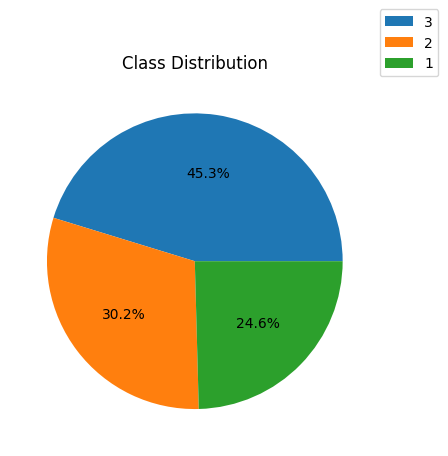

In [ ]:
plt.pie(df_cj['Class'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_cj['Class'].value_counts().index,loc=(1,1))
plt.title('Class Distribution')
plt.show()

### *Clustering Analysis Based on Class Groups*

1. **Cluster 1: High CTC (Class 1)**  
   - **Size**: **42,327 employees** (smallest cluster).  
   - **Characteristics**:  
     - Represents employees earning the highest salaries within their companies and job categories.  
     - Likely includes top-performing individuals, senior executives, or those in highly competitive industries or roles.  
   - **Opportunities**: Provide leadership development, mentorship programs, and opportunities for further specialization to retain and maximize their impact.

2. **Cluster 2: Medium CTC (Class 2)**  
   - **Size**: **51,980 employees** (mid-sized cluster).  
   - **Characteristics**:  
     - Represents employees with average compensation relative to their peers in similar roles and companies.  
     - Likely includes mid-level professionals with stable positions and moderate career progression potential.  
   - **Opportunities**: Introduce targeted training programs to help this cluster transition into Cluster 1. Provide clear pathways for promotions or salary advancements.

3. **Cluster 3: Low CTC (Class 3)**  
   - **Size**: **77,970 employees** (largest cluster).  
   - **Characteristics**:  
     - Represents employees earning below-average salaries in their companies and job categories.  
     - Likely includes entry-level employees, those in less competitive industries, or individuals in roles with limited immediate upward mobility.  
   - **Opportunities**:
     - Offer upskilling and cross-skilling programs focused on high-demand areas.
     - Enable career transitions to more lucrative roles or industries.
     - Encourage performance-based incentives or growth opportunities within their roles.

### Insights:
- **Cluster Composition**: A skewed distribution, with the majority in Class 3, suggests room for improvement in salary equity or career progression across organizations.  
- **Growth Potential**: Class 3 offers the highest potential for improvement through focused learning, mentorship, and internal mobility programs.  
- **Strategic Focus**: Employers can use insights from this clustering to prioritize career development for Classes 2 and 3, fostering talent pipelines and addressing retention challenges.  
- **High Performers**: Class 1, while the smallest group, holds strategic importance due to its high-value individuals who may benefit from retention incentives.  

## *Manual Clustering based on company*

In [ ]:
df_summ=df_grp.groupby(['company_hash_clean'])['ctc'].describe()
df_summ

count       mean        std       min        25%  \
company_hash_clean                                                           
1bs                       54.00 1528055.56  770174.21 600000.00 1000000.00   
1bs ntwyzgrgsxto ucn rna  27.00 1318518.52  845503.74 100000.00  800000.00   
20152019                   8.00 2652000.00 5424498.19 336000.00  425000.00   
2018                       6.00  937500.00  731558.27  35000.00  435000.00   
2019                       6.00  721666.67  234982.27 300000.00  700000.00   
...                         ...        ...        ...       ...        ...   
zxxn rna                   6.00  968333.33  534954.83 280000.00  577500.00   
zxyxrtzn                   7.00  672857.14  344563.22 330000.00  400000.00   
zxyxrtzn ntwyzgrgsxto     12.00  817000.00  394381.91  50000.00  590000.00   
zxzlvwvqn                 33.00 1796666.67 1282620.41 180000.00  800000.00   
zxztrtvuo                 59.00 1277508.46 1568862.06 400000.00  572500.00   

                                50%        75%         max  
company_hash_clean                                          
1bs                      1325000.00 1607500.00  3750000.00  
1bs ntwyzgrgsxto ucn rna 1000000.00 1552500.00  3500000.00  
20152019                  540000.00 1200000.00 16000000.00  
2018                      895000.00 1362500.00  2000000.00  
2019                      740000.00  832500.00  1000000.00  
...                             ...        ...         ...  
zxxn rna                 1005000.00 1290000.00  1700000.00  
zxyxrtzn                  630000.00  825000.00  1300000.00  
zxyxrtzn ntwyzgrgsxto     800000.00  992500.00  1500000.00  
zxzlvwvqn                1400000.00 2260000.00  5000000.00  
zxztrtvuo                 900000.00 1322500.00 11950000.00  

[2574 rows x 8 columns]

In [ ]:
df_c=df_grp.drop(columns=['company_hash']).merge(df_summ,on=['company_hash_clean'],how='left')
df_c

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                         job_category        ctc  ctc_updated_year  \
0                    Backend Engineer 3500000.00           2019.00   
1                    Backend Engineer  250000.00           2020.00   
2                 Product Development 1300000.00           2021.00   
3                 Product Development 2000000.00           2021.00   
4                             Unknown 3400000.00           2018.00   
...                               ...        ...               ...   
172272  Quality Assurance and Testing 3529999.00           2019.00   
172273                        Unknown 1600000.00           2018.00   
172274          IT and Cyber Security  900000.00           2019.00   
172275            Product Development  700000.00           2020.00   
172276            Product Development 1500000.00           2021.00   

        experience_years  promotion_status                 company_hash_clean  \
0                   7.00                 0                          bxwqgogen   
1                   7.00                 0                    Small companies   
2                   0.00                 0                              gunhb   
3                  17.00                 0              bxwqgotbx wgqugqvnxgz   
4                   9.00                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172272             15.00                 0                    Small companies   
172273              3.00                 0                    Small companies   
172274              5.00                 0  znn avnv srgmvr atrxctqj otqcxwto   
172275              0.00                 0                    zwq wgqugqvnxgz   
172276              3.00                 0                      sgrabvz ovwyo   

          count       mean        std       min        25%        50%  \
0       1868.00 2914053.48 2174231.38  35000.00 1800000.00 2500000.00   
1      47623.00 1353855.22 2176809.39  35000.00  450000.00  800000.00   
2        191.00 1420034.02  884414.88  35000.00  820000.00 1200000.00   
3         12.00 1756666.67 1086090.43 135000.00  975000.00 2000000.00   
4        663.00 2794263.95 1809905.62  35000.00 1800000.00 2500000.00   
...         ...        ...        ...       ...        ...        ...   
172272 47623.00 1353855.22 2176809.39  35000.00  450000.00  800000.00   
172273 47623.00 1353855.22 2176809.39  35000.00  450000.00  800000.00   
172274    19.00 1226842.11 1296551.21 440000.00  625000.00  830000.00   
172275   145.00 1199786.20  930913.92  35000.00  700000.00  850000.00   
172276   711.00 2908481.36 1908329.51  35000.00 2000000.00 2700000.00   

              75%         max  
0      3512500.00 16000000.00  
1      1400000.00 16000000.00  
2      1675000.00  6000000.00  
3      2170000.00  3600000.00  
4      3400000.00 16000000.00  
...           ...         ...  
172272 1400000.00 16000000.00  
172273 1400000.00 16000000.00  
172274 1000000.00  5500000.00  
172275 1400000.00  5500000.00  
172276 3500000.00 16000000.00  

[172277 rows x 15 columns]

In [ ]:
conditions=[df_c['ctc']<df_c['50%'],df_c['ctc']<=df_c['75%'],df_c['ctc']>df_c['75%']]
choices=[3,2,1]
df_c['Tier']=np.select(conditions,choices)
df_c['Tier'].value_counts()

Tier
3    82985
2    47000
1    42292
Name: count, dtype: int64

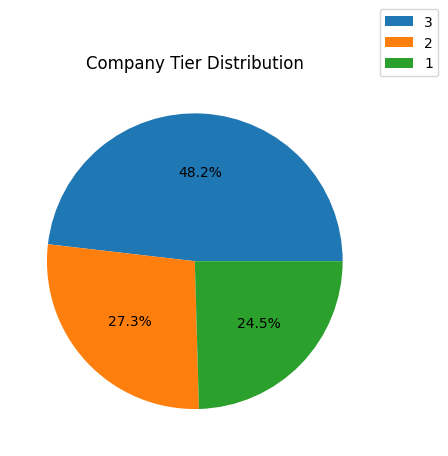

In [ ]:
plt.pie(df_c['Tier'].value_counts(normalize=True)*100,autopct='%1.1f%%')
plt.legend(labels=df_c['Tier'].value_counts().index,loc=(1,1))
plt.title('Company Tier Distribution')
plt.show()

### *Clustering Analysis Based on Tier Groups*

1. **Tier 1: High CTC**  
   - **Size**: **42,292 employees** (smallest cluster).  
   - **Characteristics**:  
     - Represents employees earning the highest salaries within their respective companies.  
     - Likely includes senior leaders, top-performing professionals, or individuals in strategic or highly valued roles.  
     - Concentrated in leading organizations or departments where CTC is a competitive factor.  
   - **Opportunities**:  
     - Retention strategies such as bonuses, stock options, and leadership opportunities.  
     - Ensure regular engagement and career development discussions to maintain satisfaction.  

2. **Tier 2: Medium CTC**  
   - **Size**: **47,000 employees** (mid-sized cluster).  
   - **Characteristics**:  
     - Represents employees with average compensation within their organizations.  
     - Likely includes mid-level staff who form the backbone of company operations.  
     - Positioned in roles with stable growth potential but not currently in top leadership or high-demand positions.  
   - **Opportunities**:  
     - Provide professional development to help transition to Tier 1.  
     - Implement performance-based incentives or tailored training programs.  

3. **Tier 3: Low CTC**  
   - **Size**: **82,985 employees** (largest cluster).  
   - **Characteristics**:  
     - Represents employees earning the lowest salaries within their organizations.  
     - Likely includes entry-level staff, those in non-strategic roles, or employees in organizations with budget constraints.  
     - May include temporary, support, or administrative roles.  
   - **Opportunities**:  
     - Focus on upskilling and reskilling programs to enable movement to higher tiers.  
     - Analyze job roles to identify gaps and potential salary adjustments to improve retention.  
     - Provide transparent pathways for growth within the organization.  

### Insights:
- **Tier Distribution**: The majority of employees fall into Tier 3, which indicates significant potential for improvement in employee growth and salary equity.  
- **Strategic Focus**:  
  - Tier 1 employees should be nurtured with retention and growth strategies to maintain organizational leadership and innovation.  
  - Tier 2 employees represent the talent pipeline for Tier 1 and should be prioritized for development opportunities.  
  - Tier 3 employees may require targeted interventions to address salary disparity and enhance their career progression prospects.  
- **Business Implication**: Companies with a large proportion of Tier 3 employees need to evaluate their salary structures and career development programs to ensure long-term talent retention and competitiveness in the market.

## <font size =6>***Answering some Questions***
---
---
<br>

<font size =5>**Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [ ]:
tier_1=df_c[df_c['Tier']==1]
tier_1.sort_values(by='ctc',ascending=False).head(10)[['email_hash','ctc']]

email_hash         ctc
165826  f63e63a8cc3db37c89a49f0498d0731f8c9e2e27943e85... 16000000.00
132645  c52d9284ad1b86ca27ce63eb24e5cd8bcb6057d093ab89... 16000000.00
156805  e90bac8558b50ac7952c2b7ea40832f94278e54e8c02ca... 16000000.00
168868  fad5d63174dbe2621696909f857a837cbbf5c547717862... 16000000.00
122381  b5daf2e423e6335860384bcc981bf370a8010181df3836... 16000000.00
7177    0a44e720e6cfaecd4e0de9ec4f7af4d65f161f3ba7447b... 16000000.00
122387  b5dc6ad6d8d8f04312c34285a3c45fd9ffdc73ff3f1205... 16000000.00
100634  959693e2906769866c04fedebecbedc75bae281b796845... 16000000.00
100612  958e5f6c063e7cea4d7999bf331cc92930bd35fa11db04... 16000000.00
156716  e8e947453901b8540be1ea26003ddaf5a27e327bdf7c8f... 16000000.00

Top employees are earning more than or equal to 1.6 Crores(as we had clipped some high pay learners ctc before).


<font size =5> **Top 10 employees of data science in each company earning more than their peers - Class 1**

In [ ]:
top_ds=df_cj[(df_cj['job_category']=='Data Scientist') & df_cj['Class']==1].sort_values(by='ctc',ascending=False)
top_ds.groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

email_hash    job_category  \
0     6b01808bba4c2d50258b068274232251620630cb252a9c...  Data Scientist   
1     eb213c0552effd7fb139395c7838edb8d59773a1cb57a0...  Data Scientist   
2     9d2537610d57179230806bb77258f63c3134b8fde9aa3a...  Data Scientist   
3     c35054c043f6a02da3e6f142fbcb095f8145eb521137ff...  Data Scientist   
4     5f4b52a1c2539fe2e4b29a8470bc57dbace331b819a0af...  Data Scientist   
...                                                 ...             ...   
1713  9be05cb8d1f11aa76fb01b9e33ff5633efb82fb22e085f...  Data Scientist   
1714  5ab93fd511bceaa6da5f855d160de306a04df9951f5978...  Data Scientist   
1715  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...  Data Scientist   
1716  3027ca561b65f99da2f65bf3d85c6bb5d5687c67e69e89...  Data Scientist   
1717  f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...  Data Scientist   

            ctc  ctc_updated_year  experience_years  promotion_status  \
0    1100000.00           2021.00              3.00                 1   
1     800000.00           2019.00              3.98                 0   
2    2600000.00           2015.00              5.00                 0   
3    2150000.00           2018.00              4.00                 0   
4    1440000.00           2019.00             17.00                 0   
...         ...               ...               ...               ...   
1713 1500000.00           2020.00              5.00                 0   
1714  800000.00           2021.00              9.00                 0   
1715 2250000.00           2021.00              7.00                 0   
1716 1370000.00           2019.00              1.00                 0   
1717 1250000.00           2021.00              2.00                 0   

             company_hash_clean  count       mean       std        min  \
0                           1bs   2.00  950000.00 212132.03  800000.00   
1                           1bs   2.00  950000.00 212132.03  800000.00   
2                         247vx   4.00 2172500.00 525063.49 1440000.00   
3                         247vx   4.00 2172500.00 525063.49 1440000.00   
4                         247vx   4.00 2172500.00 525063.49 1440000.00   
...                         ...    ...        ...       ...        ...   
1713  zxxn ntwyzgrgsxto rxbxnta   3.00 1166666.67 351188.46  800000.00   
1714  zxxn ntwyzgrgsxto rxbxnta   3.00 1166666.67 351188.46  800000.00   
1715                  zxztrtvuo   4.00 1567500.00 459592.21 1250000.00   
1716                  zxztrtvuo   4.00 1567500.00 459592.21 1250000.00   
1717                  zxztrtvuo   4.00 1567500.00 459592.21 1250000.00   

            25%        50%        75%        max  Class  
0     875000.00  950000.00 1025000.00 1100000.00      1  
1     875000.00  950000.00 1025000.00 1100000.00      3  
2    1972500.00 2325000.00 2525000.00 2600000.00      1  
3    1972500.00 2325000.00 2525000.00 2600000.00      3  
4    1972500.00 2325000.00 2525000.00 2600000.00      3  
...         ...        ...        ...        ...    ...  
1713 1000000.00 1200000.00 1350000.00 1500000.00      1  
1714 1000000.00 1200000.00 1350000.00 1500000.00      3  
1715 1340000.00 1385000.00 1612500.00 2250000.00      1  
1716 1340000.00 1385000.00 1612500.00 2250000.00      3  
1717 1340000.00 1385000.00 1612500.00 2250000.00      3  

[1718 rows x 16 columns]

In [ ]:
top_ds['ctc'].min(), top_ds['ctc'].max()

(35000.0, 16000000.0)

Different companies have different ctcs for their data scientists, as we can see the minimium amount of top 10 scientists is 35000 and as high as 1.6 crore too.

<font size= 5> **Bottom 10 employees of data science in each company earning less than their peers - Class 3**


In [ ]:
bottom_ds=df_cj[(df_cj['job_category']=='Data Scientist') & (df_cj['Class']==3)].sort_values(by='ctc',ascending=True)
bottom_ds.groupby('company_hash_clean').apply(lambda x: x.nsmallest(10, 'ctc')).reset_index(drop=True)
bottom_ds

email_hash    job_category  \
88983   84737b1d7c2ff2008c2c976f1b28d336d1caaa23159ca2...  Data Scientist   
120864  b3a96ff0081272c4627cdaa0c85b4b4f24b5c46792b035...  Data Scientist   
166960  f7fb9df2e255a4ffcd490eea712c27e09c46af7b026419...  Data Scientist   
127541  bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...  Data Scientist   
46569   455bb6d1cbeae00c7844261cbe61ead8fa2c4dd73a8021...  Data Scientist   
...                                                   ...             ...   
125351  ba4fc863ae48a6f0f68a60706a4c91cd249ffa3ff87b61...  Data Scientist   
163481  f2dc2d50ba72580f7ebfa3be85499fa3a9c9ab7b4d41c7...  Data Scientist   
14783   15777960f3e1deeda22307fff20af0a88fc6d82d6ba571...  Data Scientist   
41261   3d3685ed8b43efc9e478920c55ad9e62b8c7aded2261cd...  Data Scientist   
3031    0485990d28fdbb10e494793b31dd97f94c326a93c07a2d...  Data Scientist   

              ctc  ctc_updated_year  experience_years  promotion_status  \
88983    35000.00           2018.00              0.00                 0   
120864   35000.00           2019.00              4.00                 0   
166960   35000.00           2019.00              2.00                 0   
127541   35000.00           2021.00              0.00                 0   
46569    35000.00           2019.00              5.00                 0   
...           ...               ...               ...               ...   
125351 3300000.00           2019.00              1.00                 0   
163481 3350000.00           2017.00              5.00                 0   
14783  3500000.00           2021.00              4.00                 1   
41261  4000000.00           2019.00             22.00                 0   
3031   7000000.00           2020.00              6.00                 0   

       company_hash_clean   count       mean        std        min        25%  \
88983     Small companies 1987.00 1403064.68 1684484.82   35000.00  610000.00   
120864    Small companies 1987.00 1403064.68 1684484.82   35000.00  610000.00   
166960    Small companies 1987.00 1403064.68 1684484.82   35000.00  610000.00   
127541            onhatzn   14.00 1240000.00  877082.14   35000.00  623750.00   
46569          hztburgjta    5.00  663600.00  550092.99   35000.00  103000.00   
...                   ...     ...        ...        ...        ...        ...   
125351      sgrabvz ovwyo   10.00 3575000.00 1232488.45  850000.00 3225000.00   
163481            qdrgsxd    2.00 4175000.00 1166726.19 3350000.00 3762500.00   
14783       sgrabvz ovwyo   10.00 3575000.00 1232488.45  850000.00 3225000.00   
41261           yaew rxet    2.00 4500000.00  707106.78 4000000.00 4250000.00   
3031               wvqttb    2.00 7250000.00  353553.39 7000000.00 7125000.00   

              50%        75%         max  Class  
88983  1000000.00 1600000.00 16000000.00      3  
120864 1000000.00 1600000.00 16000000.00      3  
166960 1000000.00 1600000.00 16000000.00      3  
127541 1000000.00 1937500.00  3000000.00      3  
46569   980000.00 1000000.00  1200000.00      3  
...           ...        ...         ...    ...  
125351 3575000.00 4150000.00  5700000.00      3  
163481 4175000.00 4587500.00  5000000.00      3  
14783  3575000.00 4150000.00  5700000.00      3  
41261  4500000.00 4750000.00  5000000.00      3  
3031   7250000.00 7375000.00  7500000.00      3  

[2235 rows x 16 columns]

In [ ]:
bottom_ds['ctc'].min(),bottom_ds['ctc'].max()

(35000.0, 7000000.0)

Fot the bottom 10 data scientist of a company too the ctc varies too much. Though it is not as high as top 10 data scientist of company. Here, min is 35000 and max is 70 Lakhs.

<font size=5> **Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**


In [ ]:
df_c[df_c['Tier']==3].sort_values(by='ctc',ascending=True).head(10)[['email_hash','ctc']]

email_hash      ctc
142833  d452b7e9203a34e0e122914fc917c5a2f1d4d69d65c6c1... 35000.00
60903   5a98f5e15200b74cdd6eab47c05b7c7fbb0e2864d15a3a... 35000.00
96002   8ec504223c2221c0418eea607e3ca721858de01fc94ba1... 35000.00
30888   2dc872607f9e72097f9f6a02ebc10c58bd1a364f27c963... 35000.00
146854  da4749287db172f76c59441f3cf57daa6c9d1585a0e390... 35000.00
96235   8f19e8194461fe8aca4672ce701cec6941eb7e964c7eed... 35000.00
164044  f3a3db73d975129eee33dd45860ace5388f7d31a30028b... 35000.00
96238   8f1ad264d5af98afc09fe6233d2aefbbd17493991caf16... 35000.00
146868  da4b429fafaaf0f934df1b1fc1fc655d7b6cc0c849e811... 35000.00
30999   2def419d9ce9a2ca86afac645fd7531d572ab2dd9eabad... 35000.00

The lowest amount is 35000 as clipped earlier for low ctc learners.

<font size=5>**Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [ ]:
top_10_exp=df_c[(df_c['experience_years']>=5) & (df_c['experience_years']<=7)].groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)
top_10_exp

email_hash         job_category  \
0      350df9243c5c93a9b2a330e7e665c791d9dbe0c7e20209...              Unknown   
1      bead623eebed2fdb6700e498bd7ad0fe026f4d7b9a2c25...      Mobile Engineer   
2      2b50861d0780b85284d70b0d8d284c6db631fc7462870f...              Unknown   
3      a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...     Backend Engineer   
4      a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...  Product Development   
...                                                  ...                  ...   
11365  66a9ddfbd95e2f5fb57e5f649bd22eeeb7c1a9aec920b8...    Frontend Engineer   
11366  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...       Data Scientist   
11367  3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b64...    Frontend Engineer   
11368  16c227291d7c4f151b52599cc15e1ddd6f7e12a694753c...     Backend Engineer   
11369  4a5bc81d942bb281d18a27b6ceb622de65d07a13bc5ab9...              Unknown   

             ctc  ctc_updated_year  experience_years  promotion_status  \
0     3300000.00           2016.00              5.00                 0   
1     2400000.00           2019.00              7.00                 0   
2     1600000.00           2019.00              5.00                 0   
3     1600000.00           2019.00              5.00                 0   
4     1600000.00           2021.00              7.00                 0   
...          ...               ...               ...               ...   
11365 2500000.00           2021.00              7.00                 0   
11366 2250000.00           2021.00              7.00                 0   
11367 1800000.00           2019.00              6.00                 0   
11368 1780000.00           2020.00              5.00                 1   
11369 1275000.00           2020.00              6.00                 0   

      company_hash_clean  count       mean        std       min        25%  \
0                    1bs  54.00 1528055.56  770174.21 600000.00 1000000.00   
1                    1bs  54.00 1528055.56  770174.21 600000.00 1000000.00   
2                    1bs  54.00 1528055.56  770174.21 600000.00 1000000.00   
3                    1bs  54.00 1528055.56  770174.21 600000.00 1000000.00   
4                    1bs  54.00 1528055.56  770174.21 600000.00 1000000.00   
...                  ...    ...        ...        ...       ...        ...   
11365          zxztrtvuo  59.00 1277508.46 1568862.06 400000.00  572500.00   
11366          zxztrtvuo  59.00 1277508.46 1568862.06 400000.00  572500.00   
11367          zxztrtvuo  59.00 1277508.46 1568862.06 400000.00  572500.00   
11368          zxztrtvuo  59.00 1277508.46 1568862.06 400000.00  572500.00   
11369          zxztrtvuo  59.00 1277508.46 1568862.06 400000.00  572500.00   

             50%        75%         max  Class  Tier  
0     1325000.00 1607500.00  3750000.00      1     1  
1     1325000.00 1607500.00  3750000.00      1     1  
2     1325000.00 1607500.00  3750000.00      2     2  
3     1325000.00 1607500.00  3750000.00      2     2  
4     1325000.00 1607500.00  3750000.00      2     2  
...          ...        ...         ...    ...   ...  
11365  900000.00 1322500.00 11950000.00      1     1  
11366  900000.00 1322500.00 11950000.00      1     1  
11367  900000.00 1322500.00 11950000.00      1     1  
11368  900000.00 1322500.00 11950000.00      1     1  
11369  900000.00 1322500.00 11950000.00      2     2  

[11370 rows x 17 columns]

Again the above df shows all the learners earning more than their peers and having 5-7 years of experience.

<br>

<font size=5>**Top 10 companies (based on their CTC)**


In [ ]:
df_c.groupby('company_hash_clean')['ctc'].mean().sort_values(ascending=False).head(10)

company_hash_clean
bvwjo                    6970833.33
wvqttb                   6718291.67
nyt sqtvn wghqoto        6613333.33
axoy ztnfgqp             6558333.33
xzaxvmhrro               6221666.67
ho tzsxzttqxzs wgbuvzj   5968333.33
qgjvr tzextra            5546666.67
ntvwy egq xzaxv          4902000.00
vbvkgz rvm126            4655000.00
ngftq qtotvqwy wvuxnvr   4443347.83
Name: ctc, dtype: float64

The above ids are the list of top 10 companies with high ctc. The scaler can collaborate with these companies to place their learners or to get more students from them through some internal deals through apprenticeship etc.<br><br>
<font size =5>**Top 2 positions in every company (based on their CTC)**

In [ ]:
job_df=df_grp.groupby(['company_hash_clean','job_category'])['ctc'].mean().reset_index()
top_2=job_df.groupby('company_hash_clean').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True)
top_2

company_hash_clean           job_category        ctc
0                          1bs             Management 2500000.00
1                          1bs                Unknown 1850000.00
2     1bs ntwyzgrgsxto ucn rna       Backend Engineer 1504687.50
3     1bs ntwyzgrgsxto ucn rna    Product Development 1425000.00
4                     20152019                Unknown 5562000.00
...                        ...                    ...        ...
5131     zxyxrtzn ntwyzgrgsxto       Backend Engineer 1013333.33
5132                 zxzlvwvqn             Management 2700000.00
5133                 zxzlvwvqn                Unknown 2224000.00
5134                 zxztrtvuo  IT and Cyber Security 2700000.00
5135                 zxztrtvuo       Backend Engineer 1738235.29

[5136 rows x 3 columns]

In [ ]:
top_2['job_category'].value_counts()

job_category
Management                         1095
Backend Engineer                    794
Product Development                 567
Unknown                             490
Non Technical Roles                 397
Data Scientist                      332
Frontend Engineer                   322
Mobile Engineer                     253
IT and Cyber Security               201
Quality Assurance and Testing       151
Software                            134
Support & Maintenance Engineer       90
Internship                           80
Analyst                              79
Research                             68
Database Administration              58
Top Officials                        10
Human Resources                       6
Fresher                               3
Data Engineer                         2
ML Engineer                           2
Teaching                              1
Operations/Administrative Roles       1
Name: count, dtype: int64

Most companies top positions as per their CTC is Management, Backend Engineer,Product Development, Data Scientist etc.

# *Data Preparation for modelling*

In [ ]:
df_grp

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                             company_hash                   job_category  \
0                               bxwqgogen               Backend Engineer   
1                            nqsn axsxnvr               Backend Engineer   
2                                   gunhb            Product Development   
3                   bxwqgotbx wgqugqvnxgz            Product Development   
4                            fvrbvqn rvmo                        Unknown   
...                                   ...                            ...   
172272           tqxwoogz ogenfvqt wvbuho  Quality Assurance and Testing   
172273                            trnqvcg                        Unknown   
172274  znn avnv srgmvr atrxctqj otqcxwto          IT and Cyber Security   
172275                    zwq wgqugqvnxgz            Product Development   
172276                      sgrabvz ovwyo            Product Development   

              ctc  ctc_updated_year  experience_years  promotion_status  \
0      3500000.00           2019.00              7.00                 0   
1       250000.00           2020.00              7.00                 0   
2      1300000.00           2021.00              0.00                 0   
3      2000000.00           2021.00             17.00                 0   
4      3400000.00           2018.00              9.00                 0   
...           ...               ...               ...               ...   
172272 3529999.00           2019.00             15.00                 0   
172273 1600000.00           2018.00              3.00                 0   
172274  900000.00           2019.00              5.00                 0   
172275  700000.00           2020.00              0.00                 0   
172276 1500000.00           2021.00              3.00                 0   

                       company_hash_clean  
0                               bxwqgogen  
1                         Small companies  
2                                   gunhb  
3                   bxwqgotbx wgqugqvnxgz  
4                            fvrbvqn rvmo  
...                                   ...  
172272                    Small companies  
172273                    Small companies  
172274  znn avnv srgmvr atrxctqj otqcxwto  
172275                    zwq wgqugqvnxgz  
172276                      sgrabvz ovwyo  

[172277 rows x 8 columns]

In [ ]:
df_grp.to_csv('df_model.csv')

In [5]:
df_grp=pd.read_csv('df_model.csv')
df_grp.drop(columns='Unnamed: 0',inplace=True)
df_grp

email_hash  \
0       00003288036a44374976948c327f246fdbdf0778546904...   
1       0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...   
2       0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...   
3       000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...   
4       00014d71a389170e668ba96ae8e1f9d991591acc899025...   
...                                                   ...   
172272  fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...   
172273  fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...   
172274  fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...   
172275  ffff49f963e4493d8bbc7cc15365423d84a767259f7200...   
172276  ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...   

                             company_hash                   job_category  \
0                               bxwqgogen               Backend Engineer   
1                            nqsn axsxnvr               Backend Engineer   
2                                   gunhb            Product Development   
3                   bxwqgotbx wgqugqvnxgz            Product Development   
4                            fvrbvqn rvmo                        Unknown   
...                                   ...                            ...   
172272           tqxwoogz ogenfvqt wvbuho  Quality Assurance and Testing   
172273                            trnqvcg                        Unknown   
172274  znn avnv srgmvr atrxctqj otqcxwto          IT and Cyber Security   
172275                    zwq wgqugqvnxgz            Product Development   
172276                      sgrabvz ovwyo            Product Development   

              ctc  ctc_updated_year  experience_years  promotion_status  \
0       3500000.0            2019.0               7.0                 0   
1        250000.0            2020.0               7.0                 0   
2       1300000.0            2021.0               0.0                 0   
3       2000000.0            2021.0              17.0                 0   
4       3400000.0            2018.0               9.0                 0   
...           ...               ...               ...               ...   
172272  3529999.0            2019.0              15.0                 0   
172273  1600000.0            2018.0               3.0                 0   
172274   900000.0            2019.0               5.0                 0   
172275   700000.0            2020.0               0.0                 0   
172276  1500000.0            2021.0               3.0                 0   

                       company_hash_clean  
0                               bxwqgogen  
1                         Small companies  
2                                   gunhb  
3                   bxwqgotbx wgqugqvnxgz  
4                            fvrbvqn rvmo  
...                                   ...  
172272                    Small companies  
172273                    Small companies  
172274  znn avnv srgmvr atrxctqj otqcxwto  
172275                    zwq wgqugqvnxgz  
172276                      sgrabvz ovwyo  

[172277 rows x 8 columns]

In [6]:
# @title *Dropping irrelevant columns*
df1=df_grp.drop(columns=['email_hash','company_hash'])
df1

job_category        ctc  ctc_updated_year  \
0                    Backend Engineer  3500000.0            2019.0   
1                    Backend Engineer   250000.0            2020.0   
2                 Product Development  1300000.0            2021.0   
3                 Product Development  2000000.0            2021.0   
4                             Unknown  3400000.0            2018.0   
...                               ...        ...               ...   
172272  Quality Assurance and Testing  3529999.0            2019.0   
172273                        Unknown  1600000.0            2018.0   
172274          IT and Cyber Security   900000.0            2019.0   
172275            Product Development   700000.0            2020.0   
172276            Product Development  1500000.0            2021.0   

        experience_years  promotion_status                 company_hash_clean  
0                    7.0                 0                          bxwqgogen  
1                    7.0                 0                    Small companies  
2                    0.0                 0                              gunhb  
3                   17.0                 0              bxwqgotbx wgqugqvnxgz  
4                    9.0                 0                       fvrbvqn rvmo  
...                  ...               ...                                ...  
172272              15.0                 0                    Small companies  
172273               3.0                 0                    Small companies  
172274               5.0                 0  znn avnv srgmvr atrxctqj otqcxwto  
172275               0.0                 0                    zwq wgqugqvnxgz  
172276               3.0                 0                      sgrabvz ovwyo  

[172277 rows x 6 columns]

In [7]:
# @title *Frequency Encoding*
comp_count=df1['company_hash_clean'].value_counts()
df1['company_hash_freq']=df1['company_hash_clean'].map(comp_count)
df1

job_category        ctc  ctc_updated_year  \
0                    Backend Engineer  3500000.0            2019.0   
1                    Backend Engineer   250000.0            2020.0   
2                 Product Development  1300000.0            2021.0   
3                 Product Development  2000000.0            2021.0   
4                             Unknown  3400000.0            2018.0   
...                               ...        ...               ...   
172272  Quality Assurance and Testing  3529999.0            2019.0   
172273                        Unknown  1600000.0            2018.0   
172274          IT and Cyber Security   900000.0            2019.0   
172275            Product Development   700000.0            2020.0   
172276            Product Development  1500000.0            2021.0   

        experience_years  promotion_status                 company_hash_clean  \
0                    7.0                 0                          bxwqgogen   
1                    7.0                 0                    Small companies   
2                    0.0                 0                              gunhb   
3                   17.0                 0              bxwqgotbx wgqugqvnxgz   
4                    9.0                 0                       fvrbvqn rvmo   
...                  ...               ...                                ...   
172272              15.0                 0                    Small companies   
172273               3.0                 0                    Small companies   
172274               5.0                 0  znn avnv srgmvr atrxctqj otqcxwto   
172275               0.0                 0                    zwq wgqugqvnxgz   
172276               3.0                 0                      sgrabvz ovwyo   

        company_hash_freq  
0                    1868  
1                   47623  
2                     191  
3                      12  
4                     663  
...                   ...  
172272              47623  
172273              47623  
172274                 19  
172275                145  
172276                711  

[172277 rows x 7 columns]

# <font size=6 color='blue'>*Kmeans*

 ## ***Experiment using OHE encoding***



In [ ]:
# @title *One Hot Encoding*
df_ohe=df1.copy()
df_ohe=pd.get_dummies(df_ohe,columns=['job_category'],drop_first=True,dtype='int')
df_ohe.drop(columns=['company_hash_clean'],inplace=True)
df_ohe

ctc  ctc_updated_year  experience_years  promotion_status  \
0      3500000.00           2019.00              7.00                 0   
1       250000.00           2020.00              7.00                 0   
2      1300000.00           2021.00              0.00                 0   
3      2000000.00           2021.00             17.00                 0   
4      3400000.00           2018.00              9.00                 0   
...           ...               ...               ...               ...   
172272 3529999.00           2019.00             15.00                 0   
172273 1600000.00           2018.00              3.00                 0   
172274  900000.00           2019.00              5.00                 0   
172275  700000.00           2020.00              0.00                 0   
172276 1500000.00           2021.00              3.00                 0   

        company_hash_freq  job_category_Backend Engineer  \
0                    1868                              1   
1                   47623                              1   
2                     191                              0   
3                      12                              0   
4                     663                              0   
...                   ...                            ...   
172272              47623                              0   
172273              47623                              0   
172274                 19                              0   
172275                145                              0   
172276                711                              0   

        job_category_Data Engineer  job_category_Data Scientist  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
172272                           0                            0   
172273                           0                            0   
172274                           0                            0   
172275                           0                            0   
172276                           0                            0   

        job_category_Database Administration  job_category_Fresher  ...  \
0                                          0                     0  ...   
1                                          0                     0  ...   
2                                          0                     0  ...   
3                                          0                     0  ...   
4                                          0                     0  ...   
...                                      ...                   ...  ...   
172272                                     0                     0  ...   
172273                                     0                     0  ...   
172274                                     0                     0  ...   
172275                                     0                     0  ...   
172276                                     0                     0  ...   

        job_category_Non Technical Roles  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
172272                                 0   
172273                                 0   
172274                                 0   
172275                                 0   
172276                                 0   

        job_category_Operations/Administrative Roles  \
0                                                  0   
1                                            

In [ ]:
# @title *Standard Scaling*
scaled=StandardScaler()
df_scaled1=pd.DataFrame(scaled.fit_transform(df_ohe),columns=df_ohe.columns)
df_scaled1

ctc  ctc_updated_year  experience_years  promotion_status  \
0       1.02             -0.42              0.61             -0.22   
1      -0.63              0.34              0.61             -0.22   
2      -0.10              1.11             -1.16             -0.22   
3       0.26              1.11              3.14             -0.22   
4       0.97             -1.19              1.12             -0.22   
...      ...               ...               ...               ...   
172272  1.03             -0.42              2.63             -0.22   
172273  0.05             -1.19             -0.40             -0.22   
172274 -0.30             -0.42              0.10             -0.22   
172275 -0.40              0.34             -1.16             -0.22   
172276  0.00              1.11             -0.40             -0.22   

        company_hash_freq  job_category_Backend Engineer  \
0                   -0.57                           1.70   
1                    1.61                           1.70   
2                   -0.65                          -0.59   
3                   -0.66                          -0.59   
4                   -0.63                          -0.59   
...                   ...                            ...   
172272               1.61                          -0.59   
172273               1.61                          -0.59   
172274              -0.66                          -0.59   
172275              -0.66                          -0.59   
172276              -0.63                          -0.59   

        job_category_Data Engineer  job_category_Data Scientist  \
0                            -0.01                        -0.18   
1                            -0.01                        -0.18   
2                            -0.01                        -0.18   
3                            -0.01                        -0.18   
4                            -0.01                        -0.18   
...                            ...                          ...   
172272                       -0.01                        -0.18   
172273                       -0.01                        -0.18   
172274                       -0.01                        -0.18   
172275                       -0.01                        -0.18   
172276                       -0.01                        -0.18   

        job_category_Database Administration  job_category_Fresher  ...  \
0                                      -0.06                 -0.01  ...   
1                                      -0.06                 -0.01  ...   
2                                      -0.06                 -0.01  ...   
3                                      -0.06                 -0.01  ...   
4                                      -0.06                 -0.01  ...   
...                                      ...                   ...  ...   
172272                                 -0.06                 -0.01  ...   
172273                                 -0.06                 -0.01  ...   
172274                                 -0.06                 -0.01  ...   
172275                                 -0.06                 -0.01  ...   
172276                                 -0.06                 -0.01  ...   

        job_category_Non Technical Roles  \
0                                  -0.35   
1                                  -0.35   
2                                  -0.35   
3                                  -0.35   
4                                  -0.35   
...                                  ...   
172272                             -0.35   
172273                             -0.35   
172274                             -0.35   
172275                             -0.35   
172276                             -0.35   

        job_category_Operations/Administrative Roles  \
0                                              -0.02   
1                                              -0.02   
2                                           

In [ ]:
# @title *Hopkins*
# !pip install pyclustertend


# not working

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# from pyclustertend import hopkins

# H = hopkins(df_scaled.iloc[:,:6], sample_size=1000)
# print("Hopkins Statistic:", H)


In [ ]:
# @title *Finding Optimal K*
wcss=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k,random_state=52)
  kmean.fit(df_scaled1)
  wcss.append(kmean.inertia_)

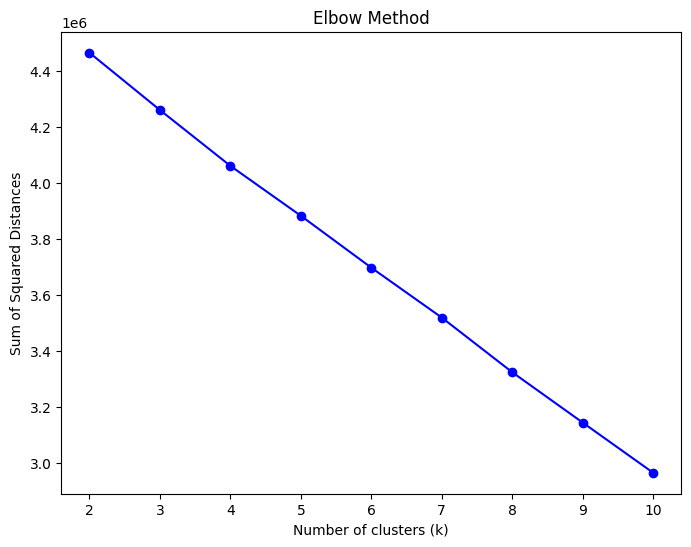

In [ ]:
# @title *Elbow Method*
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

Not able to decide best k using One hot encoding .Lets try for 5 as we get 5 as best k using label encoding

In [ ]:
model=KMeans(n_clusters=5,random_state=0)
model.fit(df_scaled1)
df_scaled1['label']=model.labels_
df_scaled1['label'].value_counts()

label
2    88960
1    35898
3    20689
4    18677
0     8053
Name: count, dtype: int64

In [ ]:
# @title *Silhouette Score*
silhouette_score(df_scaled1,model.labels_)

0.1940930955566122

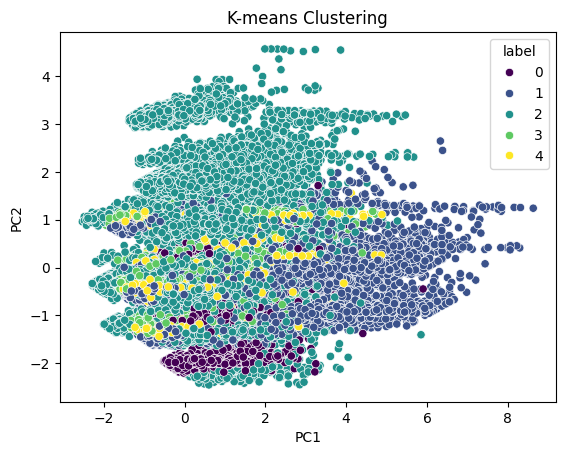

In [ ]:
# @title *PCA Vizualisation*
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled1.iloc[:,:27]),columns=['PC1','PC2'])
df_pca['label']=df_scaled1['label']

sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## ***Experiment using Label encoding***

In [8]:
# @title *Label Encoding*
df_label=df1.copy()
le=LabelEncoder()
df_label['job_category_label']=le.fit_transform(df_label['job_category'])
df_label.drop(columns=['job_category','company_hash_clean'],inplace=True)
df_label=df_label.iloc[:,[4,5,0,1,2,3]]
df_label

company_hash_freq  job_category_label        ctc  ctc_updated_year  \
0                    1868                   1  3500000.0            2019.0   
1                   47623                   1   250000.0            2020.0   
2                     191                  15  1300000.0            2021.0   
3                      12                  15  2000000.0            2021.0   
4                     663                  22  3400000.0            2018.0   
...                   ...                 ...        ...               ...   
172272              47623                  16  3529999.0            2019.0   
172273              47623                  22  1600000.0            2018.0   
172274                 19                   8   900000.0            2019.0   
172275                145                  15   700000.0            2020.0   
172276                711                  15  1500000.0            2021.0   

        experience_years  promotion_status  
0                    7.0                 0  
1                    7.0                 0  
2                    0.0                 0  
3                   17.0                 0  
4                    9.0                 0  
...                  ...               ...  
172272              15.0                 0  
172273               3.0                 0  
172274               5.0                 0  
172275               0.0                 0  
172276               3.0                 0  

[172277 rows x 6 columns]

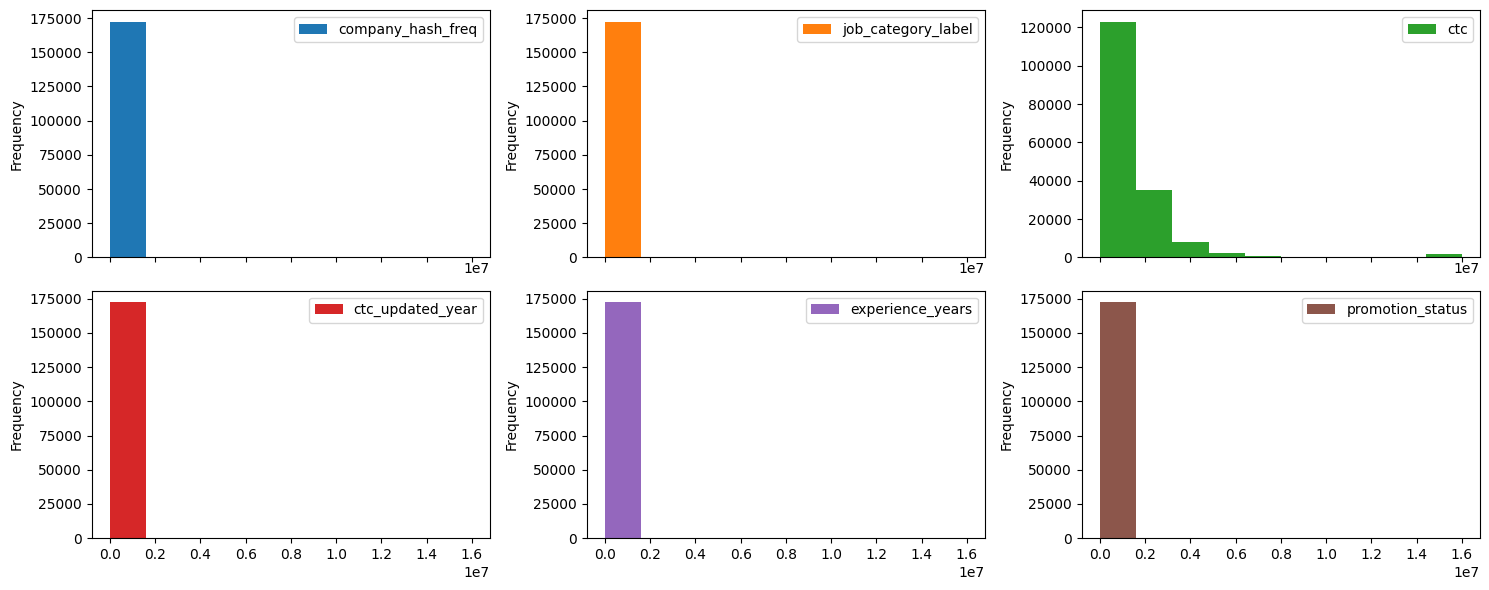

In [ ]:
df_label.plot(kind='hist',subplots=True,figsize=(15,6),sharex=True,layout=(2,3))
plt.tight_layout()
plt.show()

In [9]:
# @title *Standard Scaling*
scaled=StandardScaler()
df_scaled=pd.DataFrame(scaled.fit_transform(df_label),columns=df_label.columns)
df_scaled

company_hash_freq  job_category_label       ctc  ctc_updated_year  \
0               -0.573249           -1.286836  1.018500         -0.423385   
1                1.614735           -1.286836 -0.630167          0.343923   
2               -0.653443            0.627852 -0.097521          1.111231   
3               -0.662003            0.627852  0.257577          1.111231   
4               -0.630872            1.585195  0.967772         -1.190693   
...                   ...                 ...       ...               ...   
172272           1.614735            0.764615  1.033718         -0.423385   
172273           1.614735            1.585195  0.054664         -1.190693   
172274          -0.661668           -0.329492 -0.300434         -0.423385   
172275          -0.655643            0.627852 -0.401890          0.343923   
172276          -0.628577            0.627852  0.003936          1.111231   

        experience_years  promotion_status  
0               0.609432         -0.217783  
1               0.609432         -0.217783  
2              -1.162049         -0.217783  
3               3.140118         -0.217783  
4               1.115569         -0.217783  
...                  ...               ...  
172272          2.633981         -0.217783  
172273         -0.402843         -0.217783  
172274          0.103294         -0.217783  
172275         -1.162049         -0.217783  
172276         -0.402843         -0.217783  

[172277 rows x 6 columns]

In [ ]:
# @title *Finding Optimal K*
wcss=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k,random_state=52)
  kmean.fit(df_scaled)
  wcss.append(kmean.inertia_)

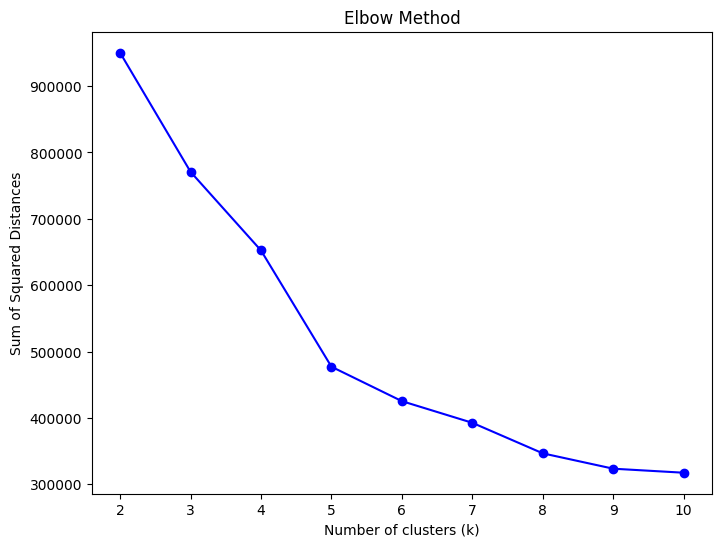

In [ ]:
# @title *Elbow Method*
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
wcss

[950213.2595292333,
 770797.7241517022,
 652347.4808066493,
 477168.49849801196,
 425300.67494486674,
 392667.3869944509,
 346659.4213578271,
 323537.0399642284,
 317478.7569444244]

In [ ]:
kmean=KMeans(n_clusters=5,random_state=52)
kmean.fit(df_scaled)
df_scaled['label']=kmean.labels_
df_scaled['label'].value_counts()

label
2    63269
0    53312
3    45112
1     7756
4     2828
Name: count, dtype: int64

In [ ]:
# @title *Silhouette Score*
silhouette_score(df_scaled,kmean.labels_)

0.296993358301809


Silhouette Score with job_category column encoded via label encoding is giving better results(**0.30**) than one hot encoding silhouette score(**0.19**)


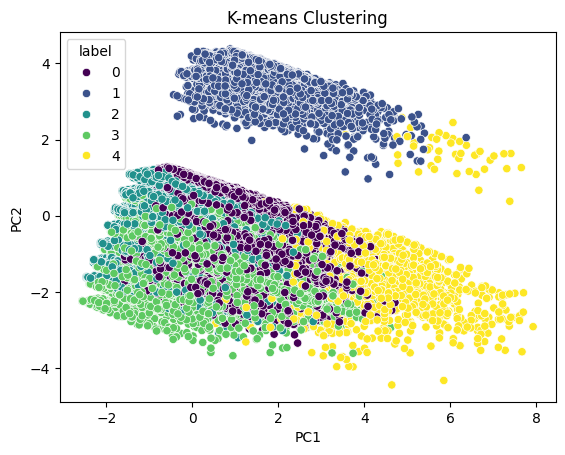

In [ ]:
# @title *PCA Vizualisation*
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled.iloc[:,:6]),columns=['PC1','PC2'])
df_pca['label']=df_scaled['label']

sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.20598237, 0.40187941])

Not better clusters are there. Lets try for more K values using DUNN index

In [ ]:
from sklearn.metrics import davies_bouldin_score as dunn_index
dunn={}
for k in range(2,10):
  model=KMeans(n_clusters=k,random_state=52)
  model.fit(df_scaled)
  lables=model.labels_
  dunn[k]=dunn_index(df_scaled,lables)
print(dunn)

{2: 1.6891945034038016, 3: 1.6065367960715509, 4: 1.3421082637444244, 5: 1.112721189263668, 6: 1.2897199015769132, 7: 0.9483256445931145, 8: 1.0261886517208603, 9: 1.1402067063246948}


Still not getting the best **K** value, i.e. no of` clusters.

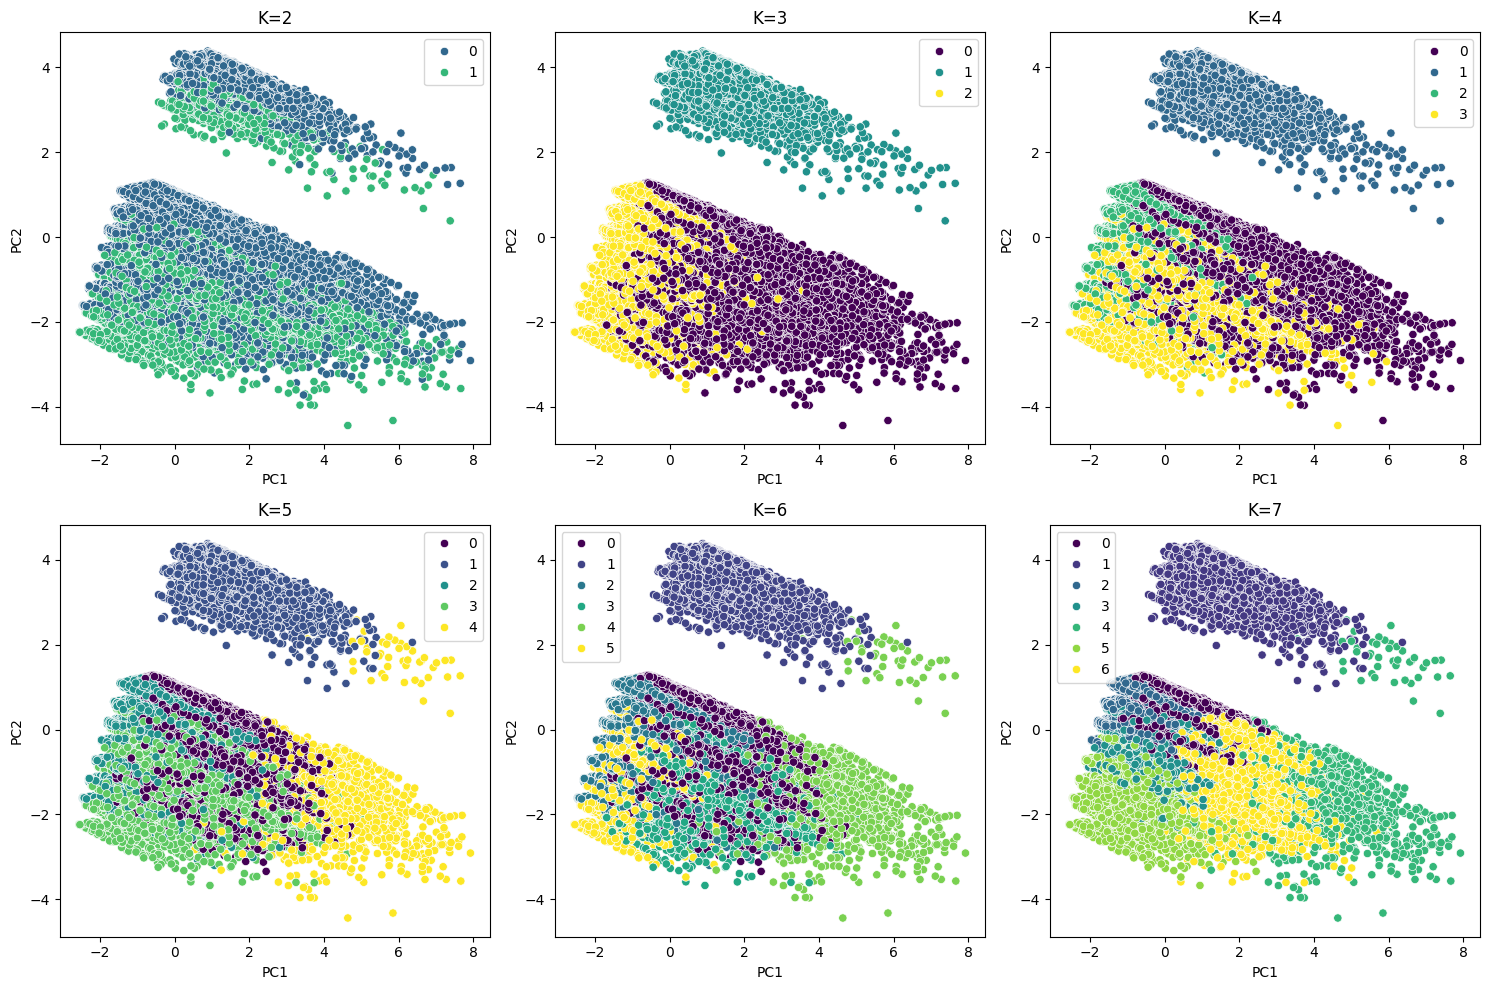

In [ ]:
plt.figure(figsize=(15,10))
for k in range(2,8):
  model=KMeans(n_clusters=k,random_state=52)
  model.fit(df_scaled)
  lables=model.labels_
  pca=PCA(n_components=2)
  df_pca=pd.DataFrame(pca.fit_transform(df_scaled),columns=['PC1','PC2'])
  df_pca['label']=lables

  plt.subplot(2,3,k-1)
  sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2',palette='viridis')
  plt.legend(loc='best')
  plt.title(f'K={k}')
plt.tight_layout()
plt.show()

Lets check for clusters 2,3,4 and 5 because rest are very cluttered

In [10]:
k=2
kmean=KMeans(n_clusters=k,random_state=52)
kmean.fit(df_scaled)
lables=kmean.labels_

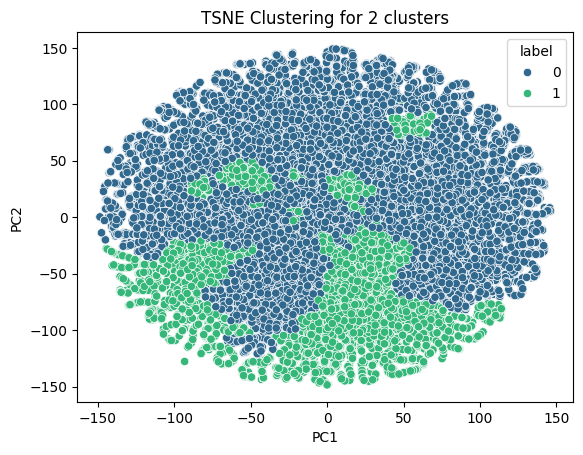

In [11]:
# @title *TSNE*
tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['PC1','PC2'])
df_tsne['label']=lables

sns.scatterplot(df_tsne,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title(f'TSNE Clustering for {k} clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [12]:
k=3
kmean=KMeans(n_clusters=k,random_state=52)
kmean.fit(df_scaled)
lables=kmean.labels_

In [ ]:
%%timeit
tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['PC1','PC2'])
df_tsne['label']=lables

sns.scatterplot(df_tsne,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title(f'TSNE Clustering for {k} clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

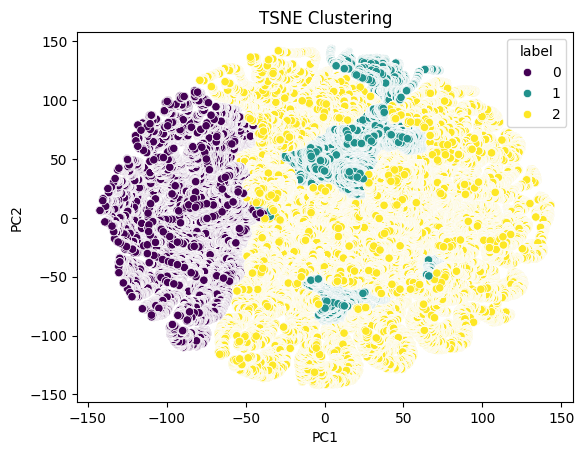

In [ ]:
k=4
kmean=KMeans(n_clusters=k,random_state=52)
kmean.fit(df_scaled)
lables=kmean.labels_

tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['PC1','PC2'])
df_tsne['label']=lables

sns.scatterplot(df_tsne,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title(f'TSNE Clustering for {k} clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

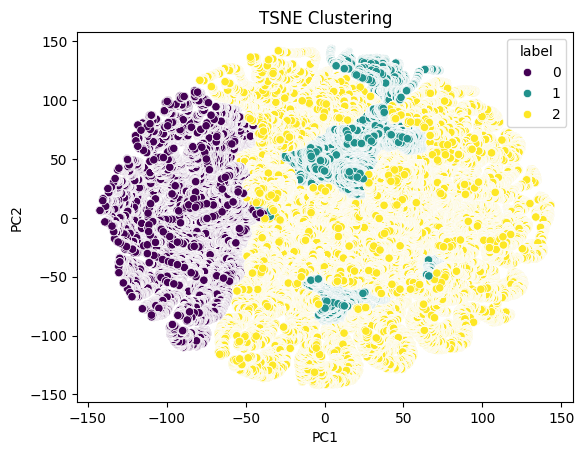

In [ ]:
k=5
kmean=KMeans(n_clusters=k,random_state=52)
kmean.fit(df_scaled)
lables=kmean.labels_

tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['PC1','PC2'])
df_tsne['label']=lables

sns.scatterplot(df_tsne,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title(f'TSNE Clustering for {k} clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# <font color='blue'> ***Hierarchial-Agglomerative Clustering***

In [ ]:
X=df_scaled.sample(fraction=0.10)

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=, affinity='euclidean', linkage='ward')
X['label']=model.fit_predict(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


Checking clustering tendency<br>

Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)<br>
Insights from Unsupervised Clustering<br>
Provide actionable Insights & Recommendations for the Business.<br>
<br>
Evaluation Criteria (100 Points):
<br>
Derform Exploratory Data Analysis (10 points)<br>

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)<br>
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.<br>

Illustrate the insights based on EDA<br>
Comments on range of attributes, outliers of various attributes<br>
Comments on the distribution of the variables and relationship between them<br>
Comments for each univariate and bivariate plots<br><br>

Unsupervised learning: (20 Points)<br>
Checking clustering tendency,
Hierarchical Clustering<br><br>
Actionable Insights & Recommendations (10 Points)<br>

**Insights**
Data Preprocessing:

The dataset contained 205,843 rows with features like hashed company name, joining date, promotion year, and post-promotion salary updates.
Missing values in the job_position column were imputed using a kNN imputer. Rows with missing values in company_hash (indicating missing company names) were dropped.
A new feature, "Years of Experience" (YOE), was created by calculating the difference between the employee's last promotion year and joining year.
Rows with negative YOE values (impossible scenarios) were removed.
Feature Engineering for Business Logic Clustering:

Three new categorical features were created:
Company_tier: Groups companies based on name, enabling compensation comparisons across job positions within the same company.
Company_job_tier: Groups by company name and job position, allowing compensation comparisons for the same job position across peers.
Company_job_yoe_tier: Groups by company name, job position, and YOE, highlighting the importance of YOE for compensation within a specific job role.
Univariate Analysis:

Inconsistency was identified in job position titles (e.g., "Software Engineer 1" and "SDE 1" representing the same role). These inconsistencies were standardized.
The dataset included entries from 32,626 unique companies with 452 distinct job positions.
The employee salary distribution, visualized through a histogram, ranged from 3 to 10 lacs per annum.
Bivariate Analysis (Heatmap):

A heatmap revealed a positive correlation between YOE, company tier, company_job_tier, and company_job_yoe_tier with CTC (salary), as expected.
The heatmap also confirmed a negative correlation between year of joining and CTC, a commonly observed trend.
Business Logic Clustering:

Clustering aimed to identify employee segments based on compensation within their company context. Here's the breakdown of the defined tiers:

Tier 1: Top 10 highest-earning employees within each company.
Class 1: Top 10 data science professionals in companies like Amazon or TCS, earning more than their peers.
Class 3: Bottom 10 data science professionals in companies like Amazon or TCS, earning less than their peers.
Tier 3: Bottom 10 lowest-earning employees within each company.
Tier X: Top 10 employees in a specific department within Amazon with 5/6/7 years of experience, earning more than their peers.
Additional Clustering Analyses:

Top 10 companies were identified based on their average CTC.
The top 2 positions (based on CTC) were identified within each company.

Unsupervised Clustering Tendency:

Hopkins test was conducted to assess data clusterability, resulting in a score of 0.89, indicating strong potential for clustering.

Feature Encoding:

Label encoding was applied to categorical features like company_hash and job_position.
Ordinal encoding was used for tier-related features (Company_tier, etc.) due to the inherent order within these categories.

K-Means and Hierarchical Clustering:

The elbow method suggested an optimal number of 2 clusters for K-means clustering, while the Silhouette method indicated 3 clusters.
Hierarchical clustering, performed on a sample of the data, suggested 4 optimal clusters.

Rationale for Choosing 3 Clusters:

The decision to focus on 3 clusters aligns with the pre-defined employee tiers used for business logic clustering.

**Recommendations:**

Data Quality Emphasis:

Data inconsistencies should be addressed before analysis to ensure reliable results.
Personalized Career Growth Insights:

By considering multiple parameters together (company, YOE, position), more accurate recommendations for career growth can be provided. For example, comparing an employee's compensation to peers within the same company can indicate potential growth opportunities.

YOE and Compensation:

The analysis revealed a positive correlation between YOE and compensation, with managerial positions offering the highest salaries.

Inter-Company Mobility:

The data suggests that employees with higher YOE in lower-tier companies might earn less than those with less experience in higher-tier companies. This highlights the potential benefits of switching companies for career advancement.
High-Earning Job Titles:

The dataset identified frontend/backend developers and data scientists as professions with generally higher salaries.

Employee Career Guidance Framework:

Internal Growth Potential: Analyze the employee's compensation compared to peers within the same company.
Upskilling for Higher Positions: If internal growth potential exists, identify positions with higher compensation for the

1. What percentage of users fall into the largest cluster?

Ans : Percentage in Largest Cluster:
The observations don't directly provide the size of the largest cluster. The report mentions K-means and Hierarchical clustering suggesting 2, 3, and 4 clusters, respectively. Without knowing the chosen method or specific cluster sizes, we can't determine the percentage in the largest cluster.

2. Comment on the characteristics that differentiate the primary clusters from each other.

Ans Characteristics of Primary Clusters:
Unfortunately, the observations lack details about the specific characteristics differentiating the clusters. However, based on the context of business logic clustering, we can infer some possibilities:

Cluster 1 (Tier 1): Top earners within each company (likely senior or managerial positions with high YOE).
Cluster 2 (Class 1 & Tier X): High-performing data scientists in specific companies (Amazon, TCS) and top earners in a specific Amazon department with 5-7 years of experience (potentially high-demand roles).
Cluster 3 (Class 3 & Tier 3): Lower-earning data scientists and bottom earners within each company (possibly newer hires or less experienced professionals).

3. Is it always true that with an increase in years of experience, the CTC increases?
Provide a case where this isn't true.

Ans. YOE and CTC Increase:
The observations suggest a positive correlation between YOE and CTC, with managerial positions having the highest salaries. However, this isn't always true. Here's a counter-example:

An employee with high YOE in a lower-tier company might earn less than someone with less experience in a higher-tier company. This case highlights the impact of company tier on compensation besides YOE.

4. Name a job position that is commonly considered entry-level but has a few
learners with unusually high CTCs in the dataset.

Ans.High CTC Entry-Level Job:
The observations don't mention specific job titles, but frontend/backend developers and data scientists are identified as generally high-paying professions. These roles can be entry-level, but some individuals with exceptional skills or experience might command higher salaries even at the entry level.

5. What is the average CTC of learners across different job positions?

Ans.Average CTC by Job Position:
The observations don't directly provide the average CTC for each job position. However, the report mentions the possibility of analyzing this using the available data.

6. For a given company, how does the average CTC of a Data Scientist compare
with other roles?

Ans. Data Scientist CTC vs. Other Roles:
For a given company, you can compare the average CTC of data scientists with other roles using the dataset. The observations suggest data scientists might be among the higher-paid roles, but the exact comparison depends on the specific company and other positions available.

7. Discuss the distribution of learners based on the Tier flag:
  1. Which companies dominate in Tier 1 and why might this be the case?
  2. Are there any notable patterns or insights when comparing learners from
  Tier 3 across different companies?

Ans. Tier Flag Distribution:
i) Tier 1 Companies:

The observations don't reveal the dominant companies in Tier 1. However, it's likely that these companies are:

* Well-established and financially strong.
* Offer competitive salaries and attract top talent.
* Have positions with high growth potential.
ii) Tier 3 Learners:

The observations don't mention specific insights for Tier 3 learners across companies. However, you could analyze the data to see if there are patterns like:
* A higher concentration of freshers or lower YOE individuals.
* Specific companies with a larger proportion of Tier 3 learners, potentially indicating lower average compensation within those companies.

8. After performing unsupervised clustering:
  1. How many clusters have been identified using the Elbow method?
  2. Do the clusters formed align or differ significantly from the manual
  clustering efforts? If so, in what way?

Ans. Unsupervised Clustering:
i) Number of Clusters:

The elbow method suggests 2 clusters, while the Silhouette method suggests 3.

ii) Comparison with Manual Clustering:

The chosen clustering method (K-means with 2 or 3 clusters) might not perfectly align with the manual clustering of 3 tiers (Tier 1, Class 1/3, Tier 3). It's possible that the unsupervised clustering doesn't fully capture the nuances of the business logic used for manual clustering.


9. From the Hierarchical Clustering results:
  1. Are there any clear hierarchies or patterns formed that could suggest the
  different levels of seniority or roles within a company?
  2. How does the dendrogram representation correlate with the 'Years of
  Experience' feature?

Ans. Hierarchical Clustering:
i) Hierarchies and Seniority:

The observations don't provide details about clear hierarchies in the dendrogram. However, analyzing the dendrogram branches might reveal groups of learners with similar characteristics (potentially related to seniority or roles).

ii) Dendrogram and YOE:

The dendrogram might show some correlation with the "Years of Experience" feature. Learners with similar YOE might cluster together, but this wouldn't be the only factor influencing cluster formation. Other features like job position and company tier could also play a role.




5. **Potential for Partnerships**: Companies with high learner counts are strong candidates for targeted partnerships, as they show significant engagement with Scaler’s programs.

6. **Actionable Insight**: Understanding the specific needs and job roles of learners from these companies could help tailor Scaler’s offerings for maximum impact.

6. **Actionable Insight**: Recent joining years highlight the need to focus on upskilling mid-level professionals, while data from earlier years may guide senior-level leadership training programs.

5. **Tailored Offerings**: A focus on creating specialized programs for learners in the lower brackets (₹0–₹4,00,000) could help them transition into mid-level roles, while advanced skill training could target those in the upper brackets.

7. **Upskilling Focus**: Customized offerings for both mid-level professionals and top earners could help learners in the ₹10–₹20 lakh range progress to higher brackets, while entry-level learners can be guided to mid-level roles.

6. **Targeted Offerings Needed**: The dominance of early and mid-level learners suggests tailoring courses for beginners and intermediates, while providing advanced leadership and niche skill programs for experienced professionals.

3. **Focus on Career Growth**: The data reveals that while most learners are still in their current roles, there is an opportunity for Scaler to tailor content or mentorship programs aimed at furthering career advancement and helping more learners achieve promotions.

4. **Impact of Courses**: The relatively small proportion of promoted learners could highlight the need for more targeted strategies and programs that enhance job performance, skills relevant to career advancement, or strategies that guide learners through the promotion process.



### Key Insights summary stats:
- **CTC Variation**: The wide salary range suggests the need for personalized learning tracks catering to entry-level, mid-level, and senior professionals.
- **Experience Alignment**: The concentration around early and mid-career learners indicates a focus on skill-building for career advancement.
- **Promotion Potential**: With a small proportion of promoted learners, there is an opportunity for Scaler to create specialized programs that increase promotion rates, potentially enhancing learner satisfaction and success rates.
- **High Diversity in Companies**: The dataset represents a wide range of organizations, emphasizing Scaler's reach across various industries.
- **Duplicate Email Records**: The presence of multiple occurrences of the same email hash suggests the need for data cleaning to ensure accurate analysis.
- **Backend Engineer Dominance**: The popularity of backend engineering roles indicates high demand for backend development skills, potentially guiding the creation of tailored courses.



### Key Insights:
- **Loyalty or Specialization**: The high number of single-company learners suggests employees are loyal to their organization or focused on deepening their expertise within a specific role or company.
- **Potential Opportunity for Scaler**: Dual-company learners and the single triple-company learner might represent individuals undergoing frequent role changes, who could benefit from specialized programs targeting career transitions.- Only 1 learner is ther who switched 3 companies.
- 6880 learners are those who moved to 2 companies
- Remaining 1.46 lakhs sticked to their first company who may want to move to better company and role. Thus, upskilling themselves
### Key Insights:
- **CTC Distribution Skewed to Middle/Low**: A larger proportion of employees are in the average or lower pay categories, suggesting a higher concentration of learners at the early to mid-career stages or in less lucrative roles.
- **Focus on Upskilling**: Employees in **Designation 3** may benefit most from targeted courses to improve their skills and increase earning potential.
- **Opportunities for High Earners**: Learners in **Designation 1** could be provided advanced or leadership-focused programs to further their careers.


